In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv


In [4]:
# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import datasets
train_data = pd.read_csv("/kaggle/input/dataset/train.csv")
train_data.head()

test_data = pd.read_csv("/kaggle/input/dataset/test.csv")
test_data.head()


,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4
0,93313,1862.7260,447.1666,278.4893,0.7824,344.6880,0.9361,99678,0.7607,1.6057,0.3380,0.7708,0.0048,0.0030,0.5942,0.9541
1,78778,2159.5969,439.1004,240.0113,0.8374,316.7069,0.9340,84345,0.7265,1.8295,0.2123,0.7213,0.0056,0.0030,0.5202,0.9517
2,74757,1661.6720,441.6910,225.3914,0.8600,308.5183,0.9359,79873,0.7255,1.9597,0.3402,0.6985,0.0059,0.0030,0.4879,0.9561
3,88074,2199.8889,460.8836,283.3717,0.7886,334.8721,0.8709,101133,0.6922,1.6264,0.2287,0.7266,0.0052,0.0032,0.5279,0.8586
4,79318,2589.4900,429.3032,279.5817,0.7589,317.7905,0.8666,91528,0.6634,1.5355,0.1486,0.7402,0.0054,0.0035,0.5480,0.8414


In [6]:
print(train_data.shape)

print(test_data.shape)

(1288, 17)
(430, 16)


In [7]:
train_data.info()

#test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1288 entries, 0 to 1287
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           1288 non-null   int64  
 1   perimeter      1288 non-null   float64
 2   major_axis     1288 non-null   float64
 3   minor_axis     1288 non-null   float64
 4   eccentricity   1288 non-null   float64
 5   eqdiasq        1288 non-null   float64
 6   solidity       1288 non-null   float64
 7   convex_area    1288 non-null   int64  
 8   extent         1288 non-null   float64
 9   aspect_ratio   1288 non-null   float64
 10  roundness      1288 non-null   float64
 11  compactness    1288 non-null   float64
 12  shapefactor_1  1288 non-null   float64
 13  shapefactor_2  1288 non-null   float64
 14  shapefactor_3  1288 non-null   float64
 15  shapefactor_4  1288 non-null   float64
 16  target         1288 non-null   int64  
dtypes: float64(14), int64(3)
memory usage: 171.2 KB


In [8]:
# Class distribution
print(train_data.groupby('target').size())

target
0    551
1    737
dtype: int64


In [9]:
train_data.columns

Index(['area', 'perimeter', 'major_axis', 'minor_axis', 'eccentricity',
       'eqdiasq', 'solidity', 'convex_area', 'extent', 'aspect_ratio',
       'roundness', 'compactness', 'shapefactor_1', 'shapefactor_2',
       'shapefactor_3', 'shapefactor_4', 'target'],
      dtype='object')

**Visualization**

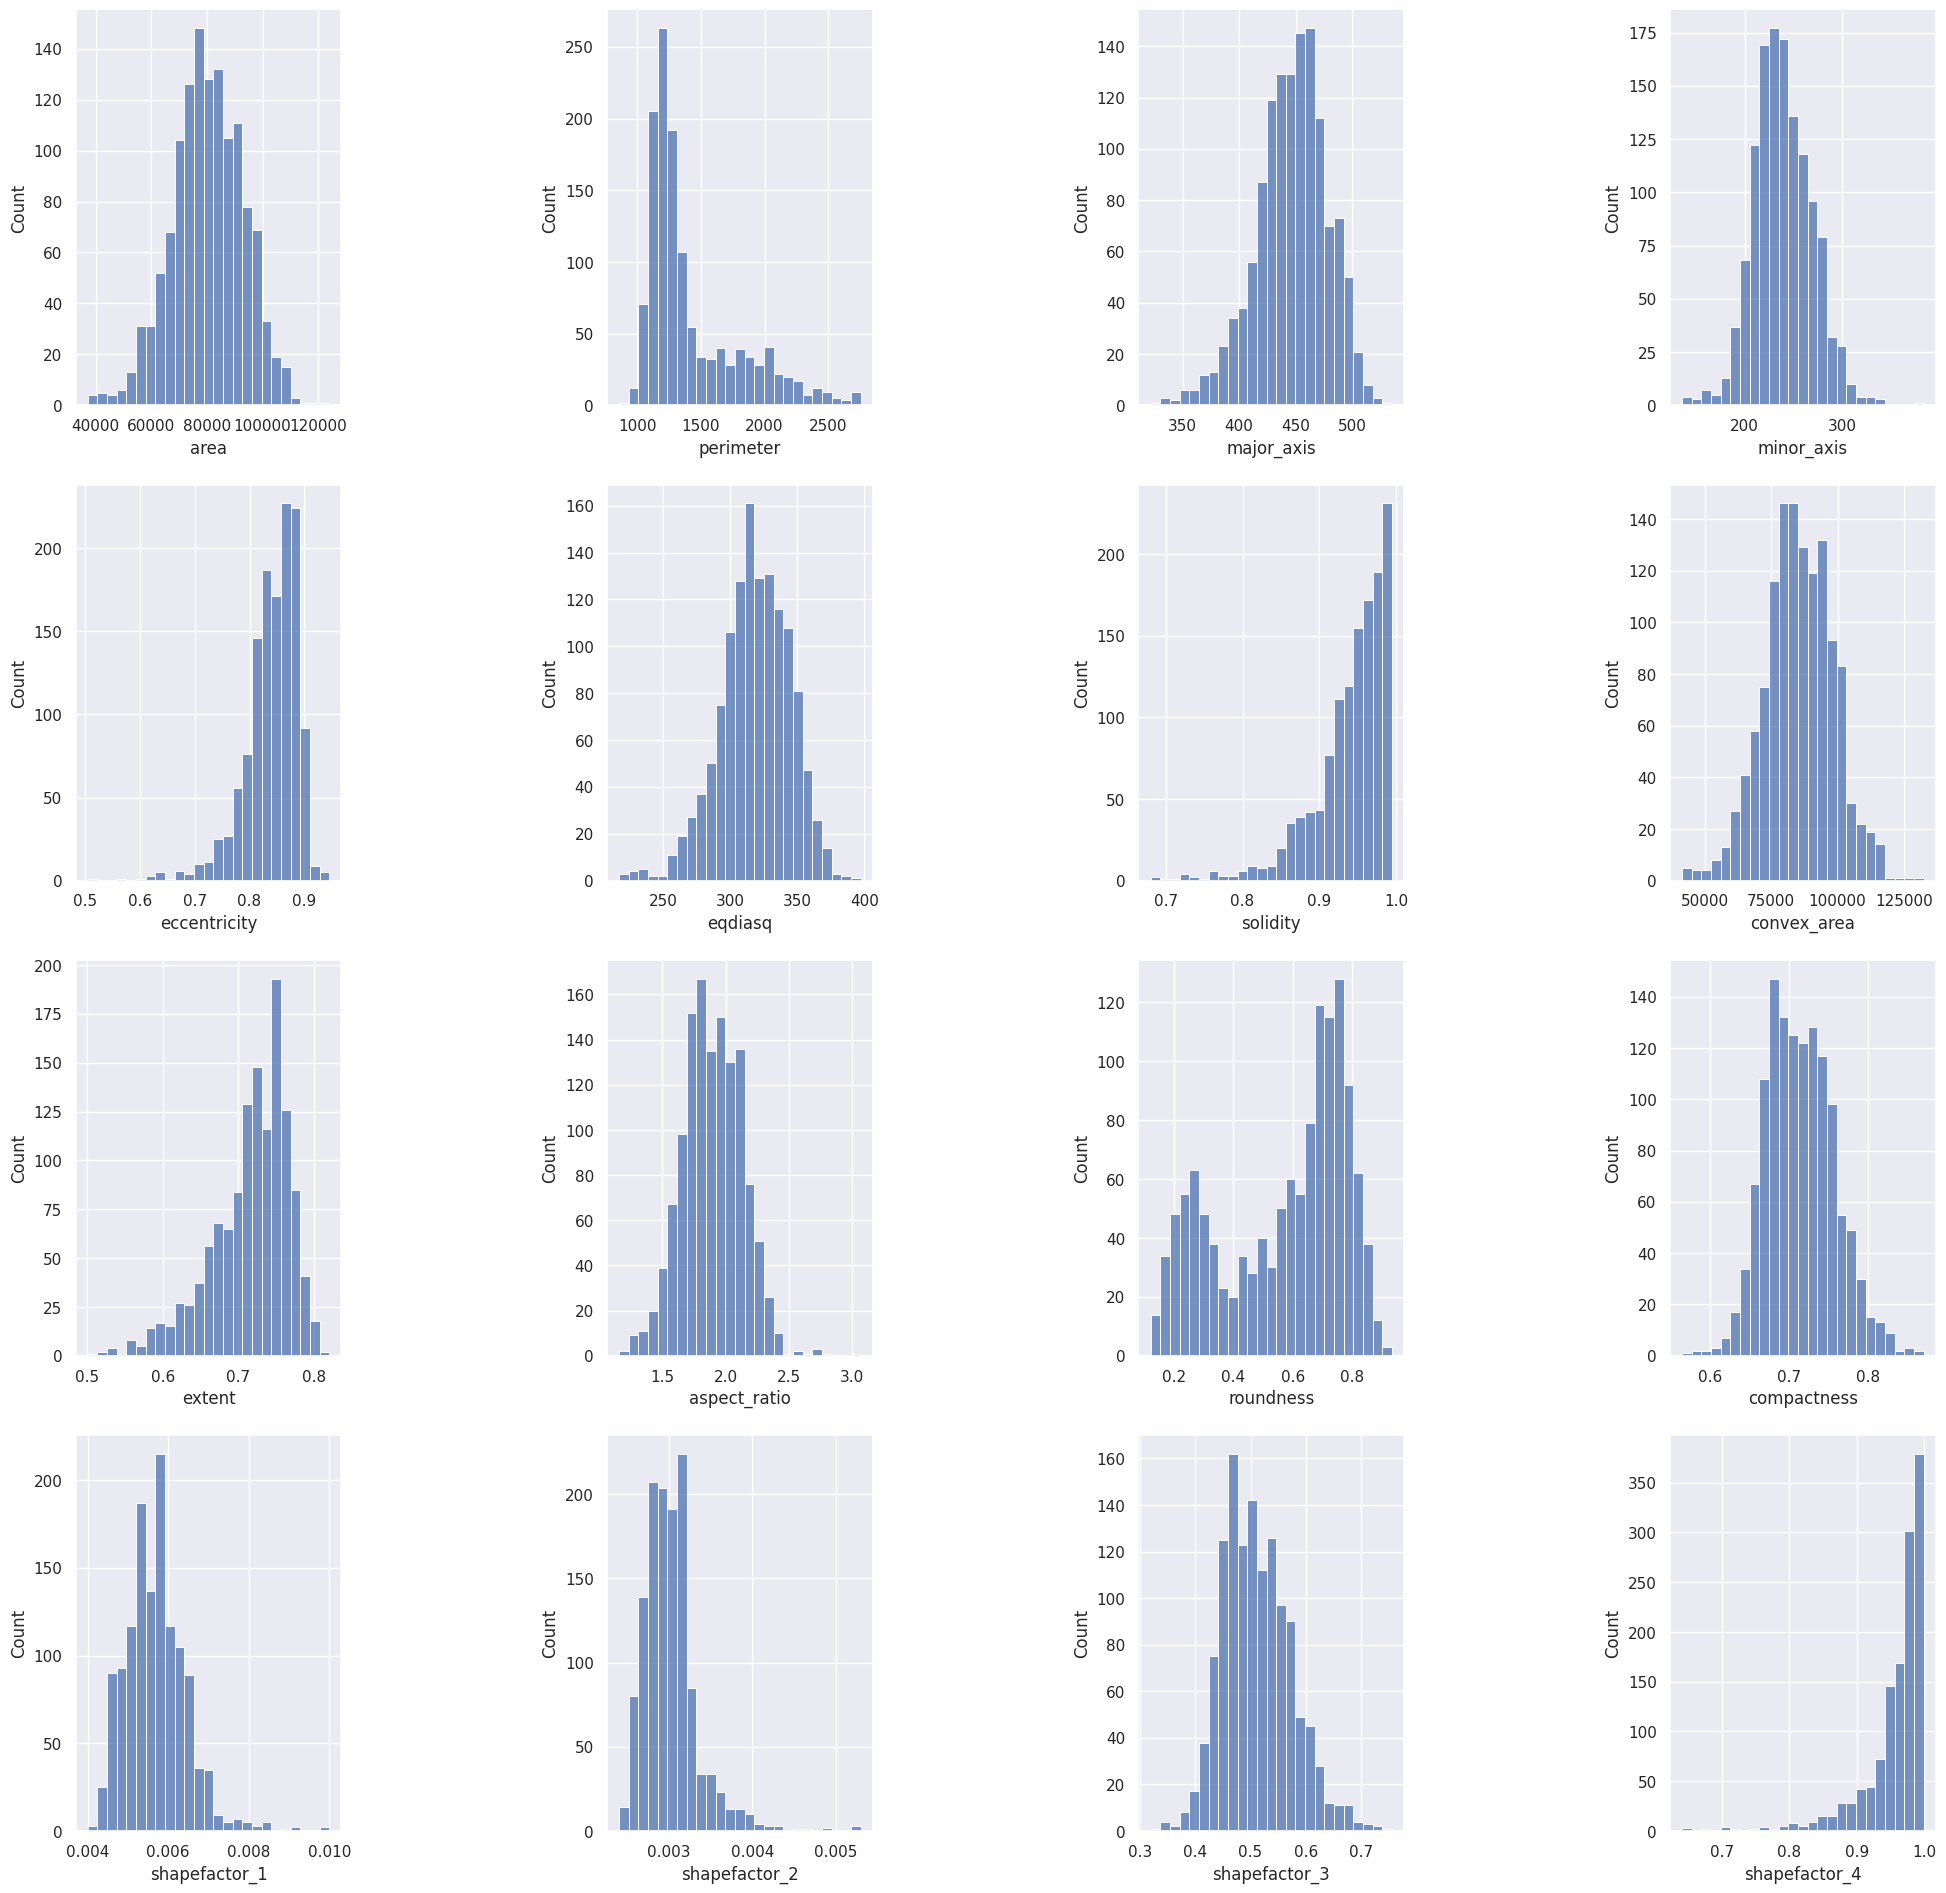

In [10]:
#Histogram
data_numeric = train_data.select_dtypes(include='number')
column_numeric = data_numeric.columns.drop('target')



plt.figure(figsize=(24,36))
plt.subplots_adjust(wspace=1, hspace=None)

i = 1
for col_name in column_numeric:
    plt.subplot(6,4,i)
    sns.histplot(data = train_data[col_name],  bins = 25)
    i +=1

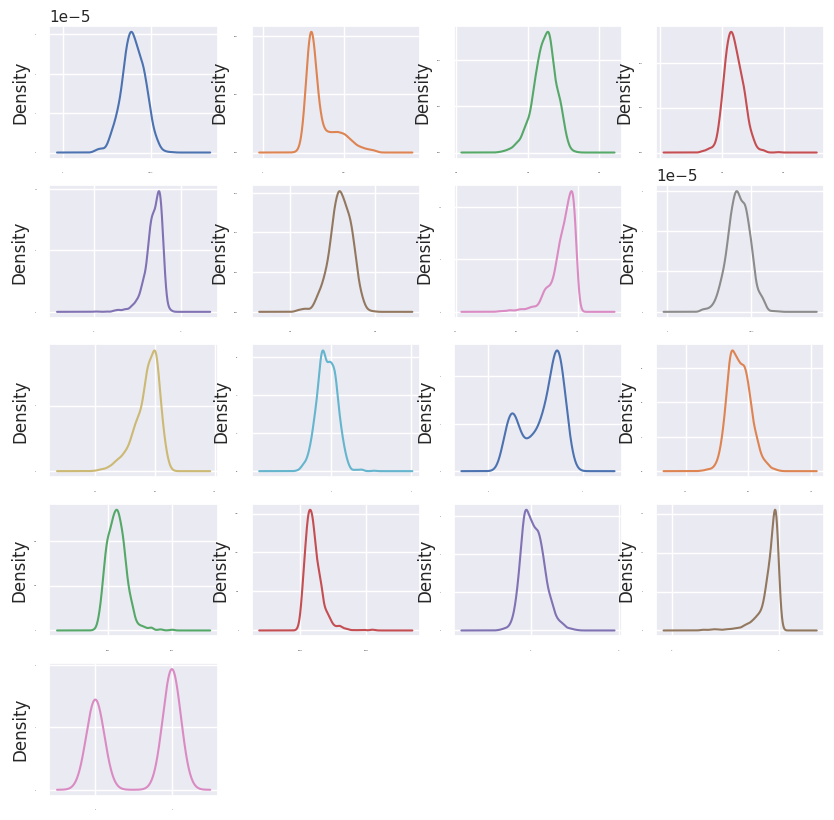

In [11]:
# визуализация распределение плотности
data_numeric.plot(kind='density', subplots=True, layout=(5,4), figsize=(10, 10), sharex=False, legend=False, fontsize=1)
plt.show()

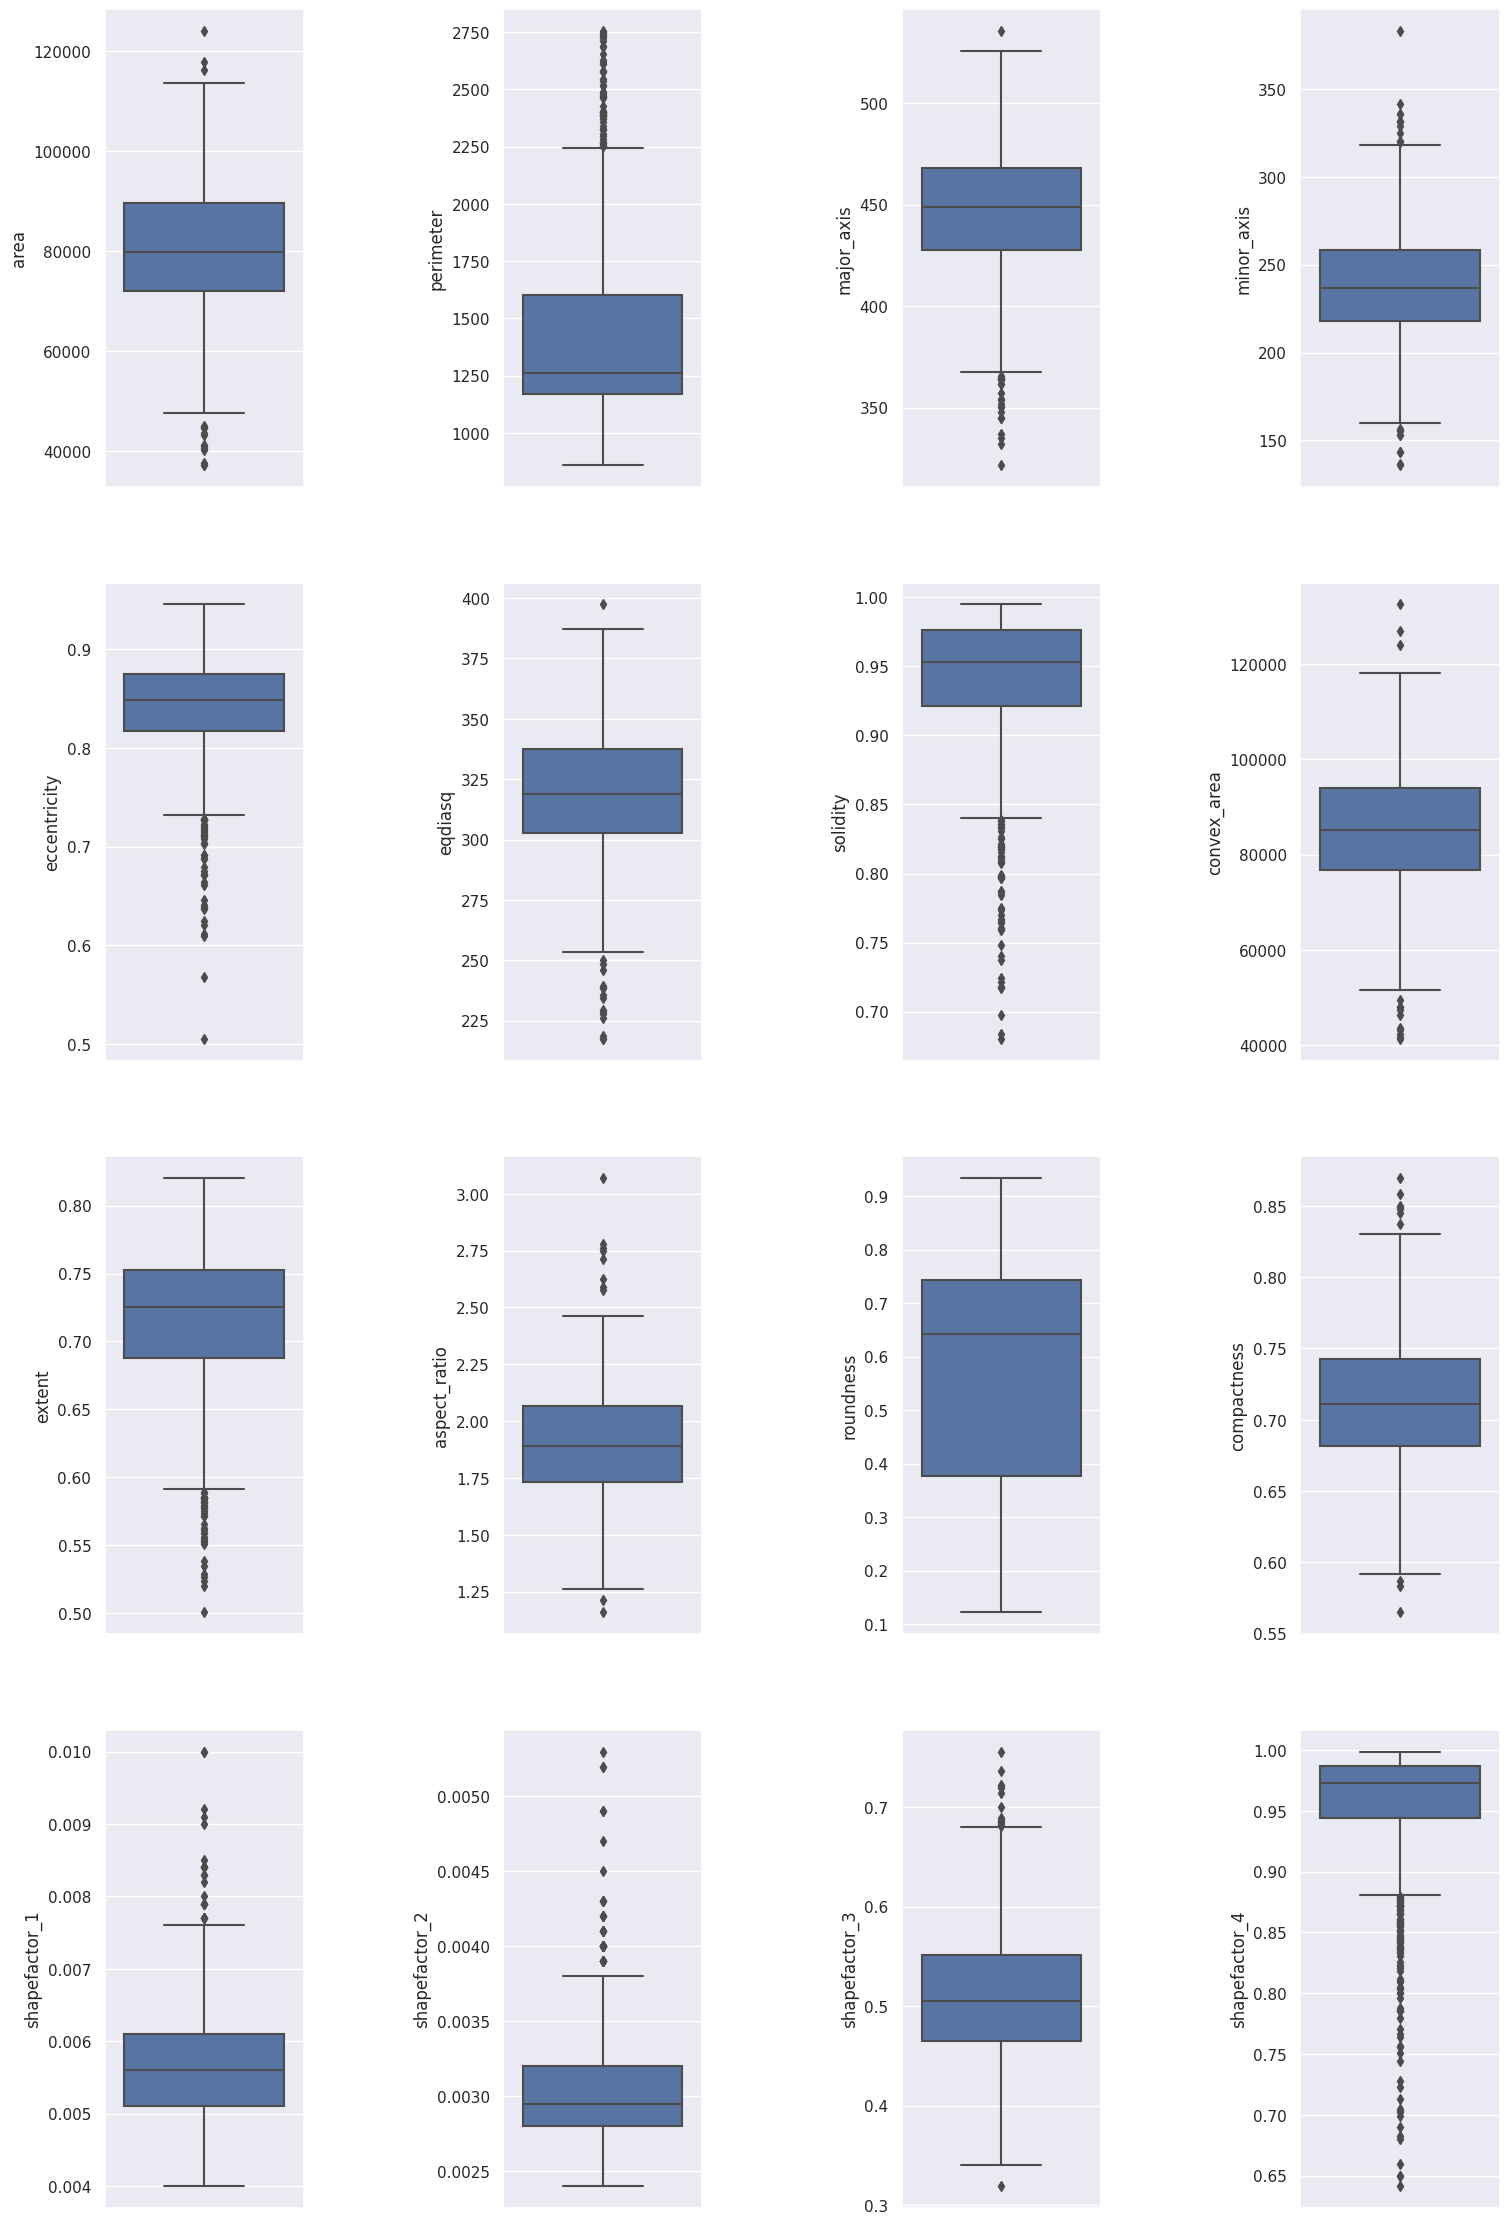

In [12]:
# Box Plots
plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)


i = 1
for col_name in column_numeric:
    plt.subplot(5,4,i)
    sns.boxplot(data=train_data, y=col_name)
    i +=1

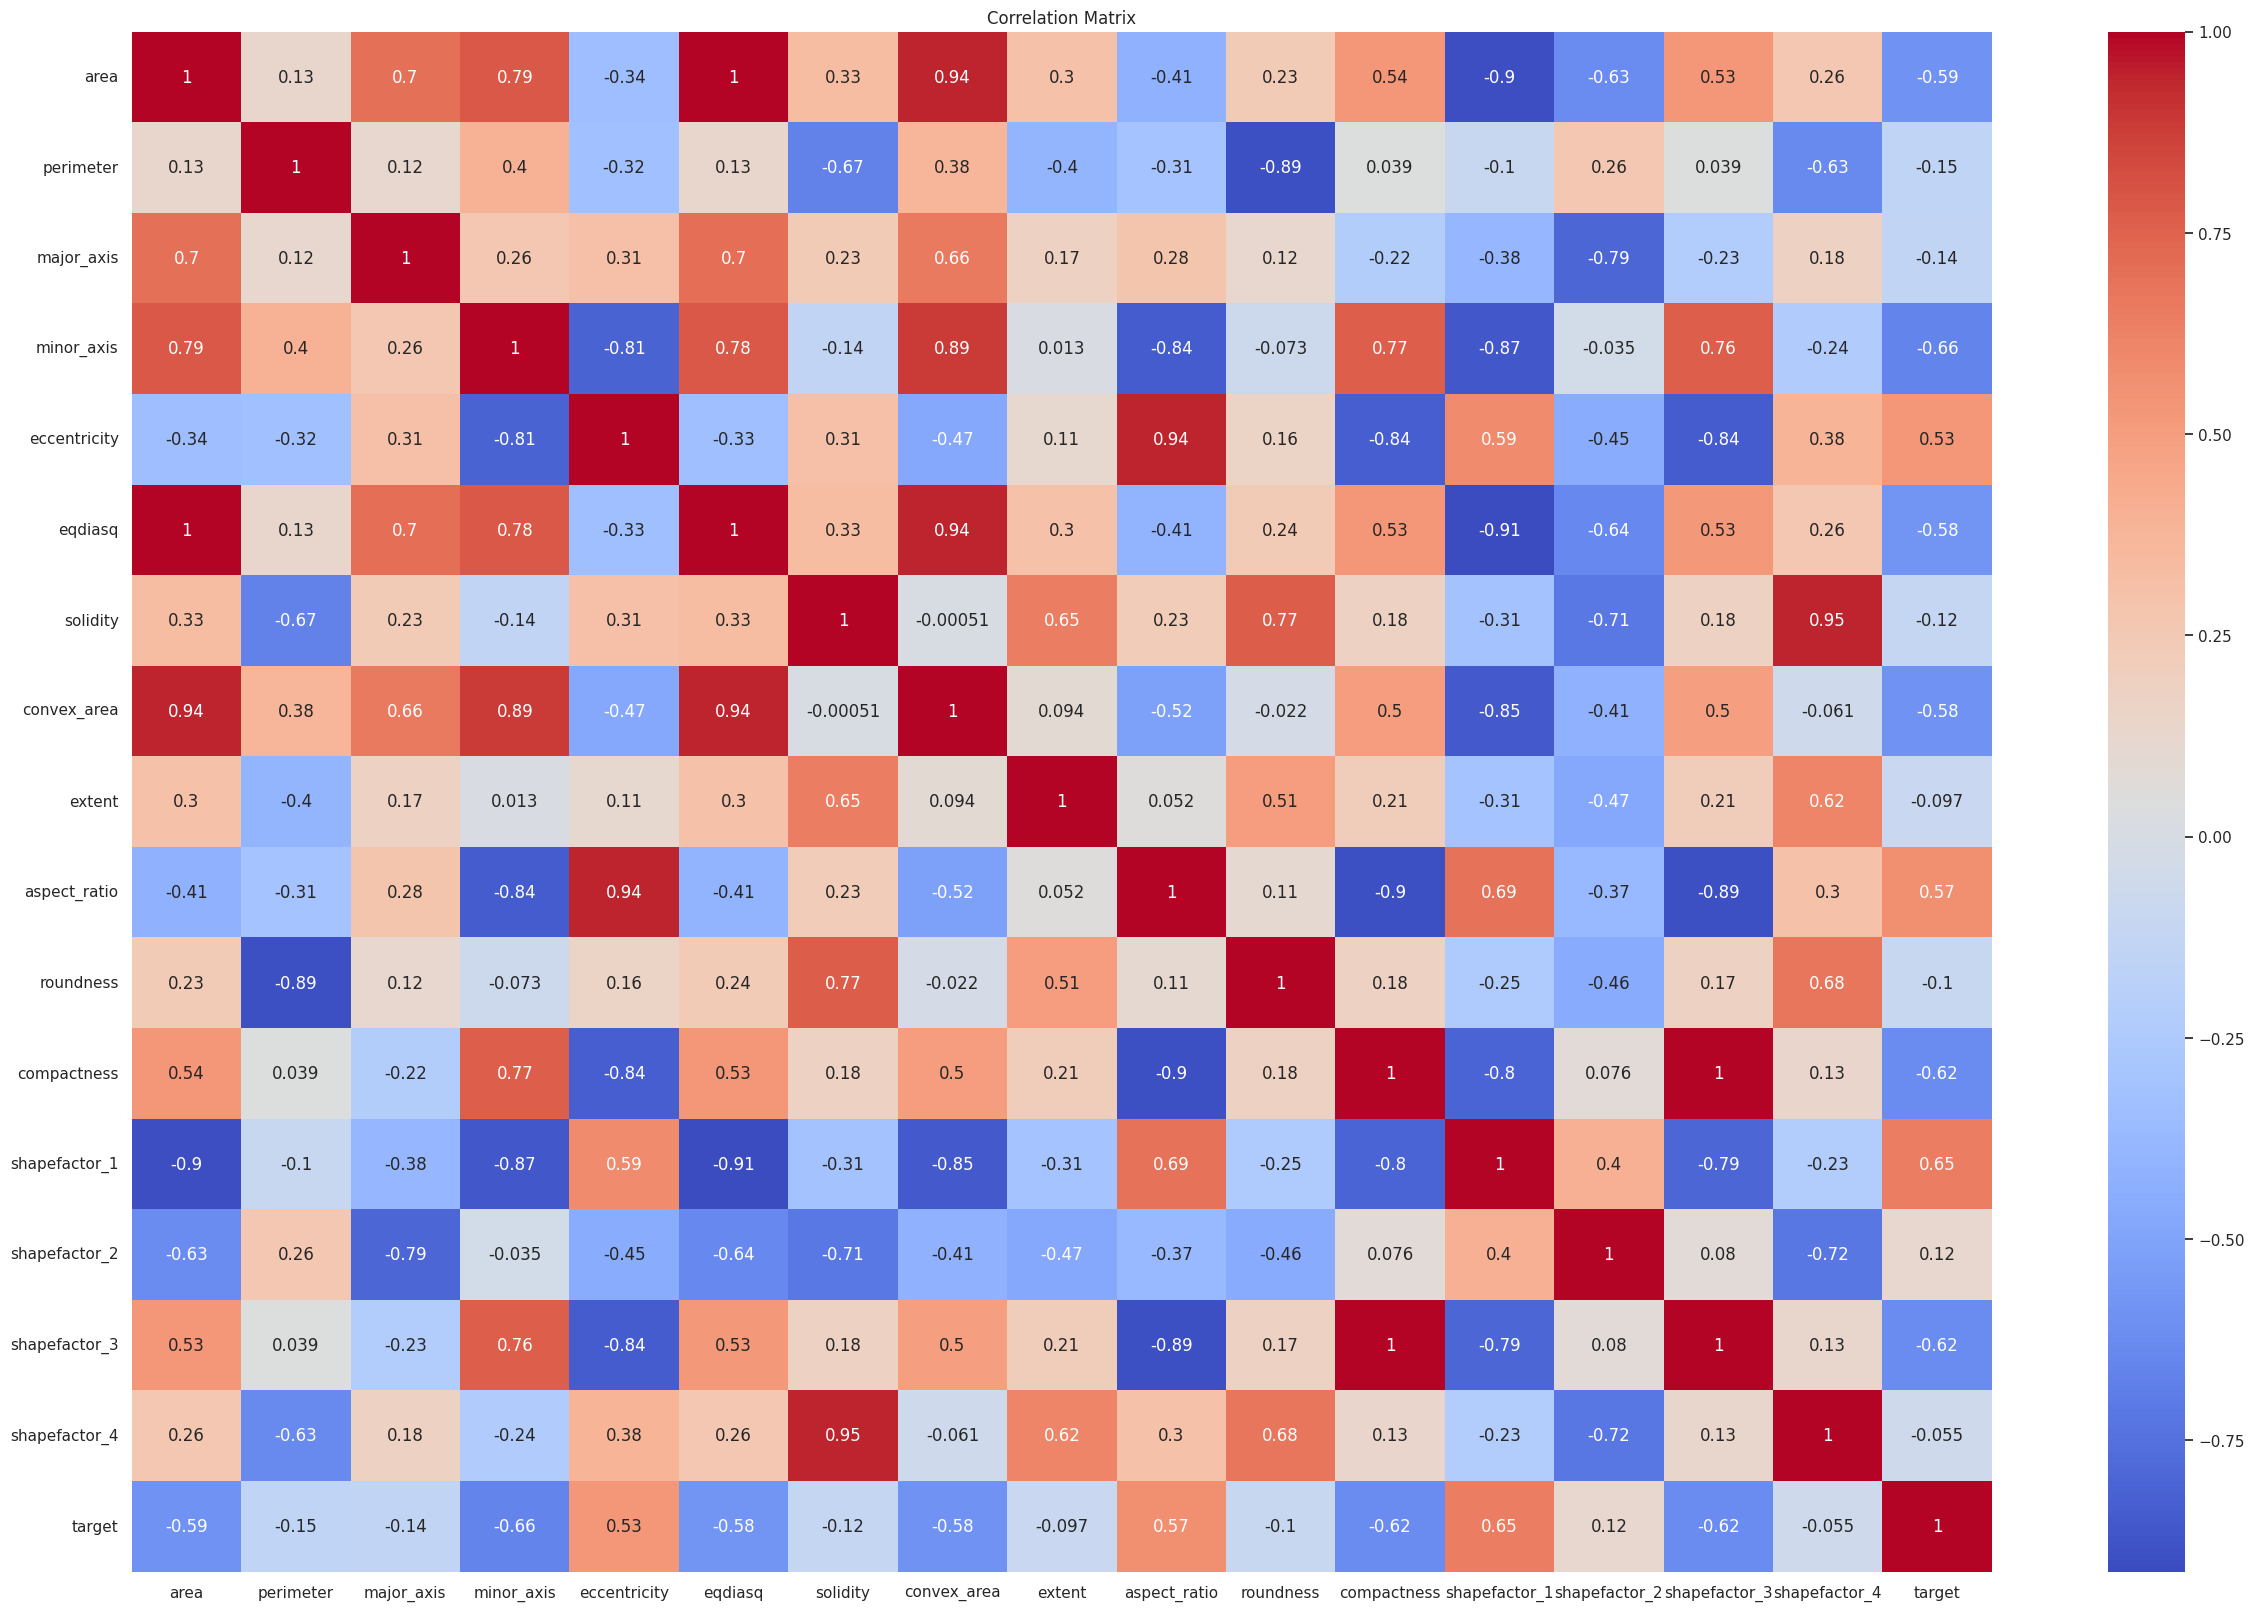

In [13]:
# Calculate the correlation matrix

corr_matrix =train_data.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

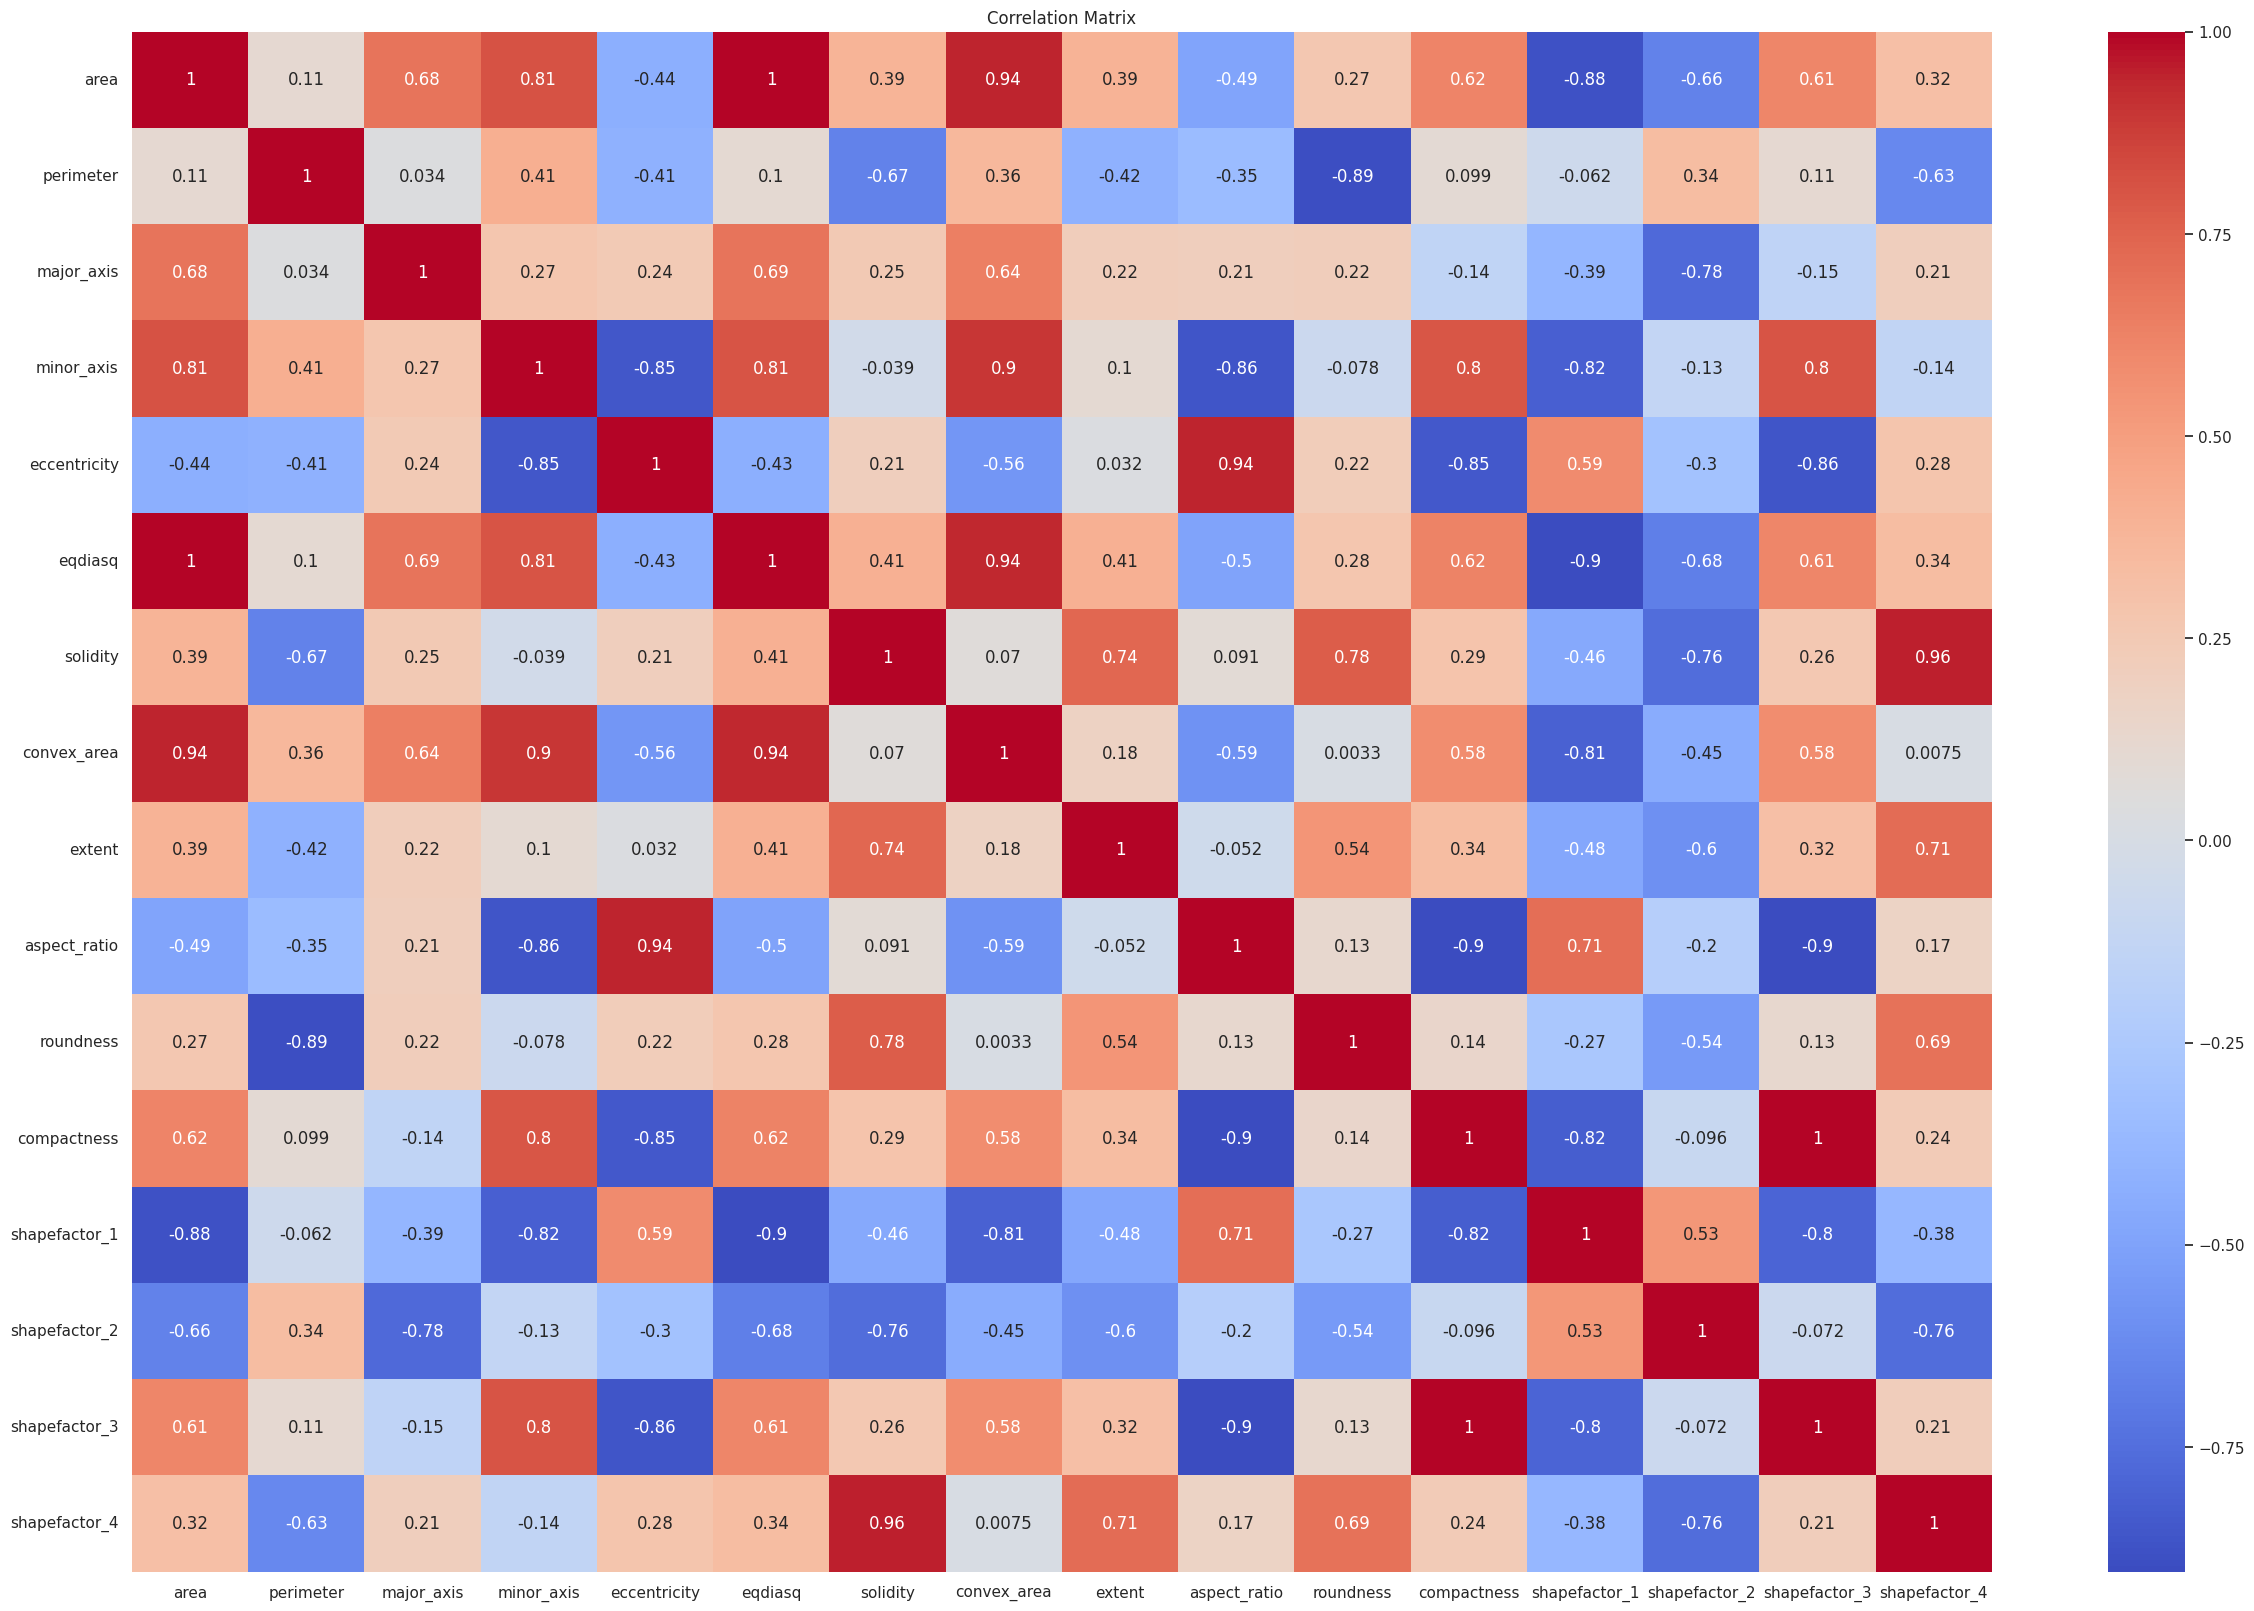

In [14]:
# Calculate the correlation matrix for test_data

corr_matrix =test_data.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [15]:
new_train_data = pd.read_csv("/kaggle/input/dataset/train.csv")
new_train_data.head()

,area,perimeter,major_axis,minor_axis,eccentricity,eqdiasq,solidity,convex_area,extent,aspect_ratio,roundness,compactness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,75516,1731.4840,411.7352,245.7620,0.8023,310.0806,0.9148,82546,0.7169,1.6753,0.3165,0.7531,0.0055,0.0033,0.5672,0.9502,1
1,98903,1374.4370,477.2451,269.7676,0.8249,354.8622,0.9585,103181,0.7679,1.7691,0.6579,0.7436,0.0048,0.0027,0.5529,0.9781,0
2,84746,1311.1570,482.7735,235.9040,0.8725,328.4843,0.9121,92914,0.7162,2.0465,0.6195,0.6804,0.0057,0.0028,0.4630,0.9474,1
3,98184,1463.1680,434.3769,292.6472,0.7390,353.5700,0.9543,102890,0.7316,1.4843,0.5763,0.8140,0.0044,0.0030,0.6625,0.9834,0
4,94170,1267.7271,440.1109,278.4162,0.7745,346.2672,0.9643,97656,0.6836,1.5808,0.7363,0.7868,0.0047,0.0030,0.6190,0.9785,0


In [16]:
new_train_data=new_train_data.drop(['eqdiasq','compactness'], axis=1)
new_train_data.head()

,area,perimeter,major_axis,minor_axis,eccentricity,solidity,convex_area,extent,aspect_ratio,roundness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4,target
0,75516,1731.4840,411.7352,245.7620,0.8023,0.9148,82546,0.7169,1.6753,0.3165,0.0055,0.0033,0.5672,0.9502,1
1,98903,1374.4370,477.2451,269.7676,0.8249,0.9585,103181,0.7679,1.7691,0.6579,0.0048,0.0027,0.5529,0.9781,0
2,84746,1311.1570,482.7735,235.9040,0.8725,0.9121,92914,0.7162,2.0465,0.6195,0.0057,0.0028,0.4630,0.9474,1
3,98184,1463.1680,434.3769,292.6472,0.7390,0.9543,102890,0.7316,1.4843,0.5763,0.0044,0.0030,0.6625,0.9834,0
4,94170,1267.7271,440.1109,278.4162,0.7745,0.9643,97656,0.6836,1.5808,0.7363,0.0047,0.0030,0.6190,0.9785,0


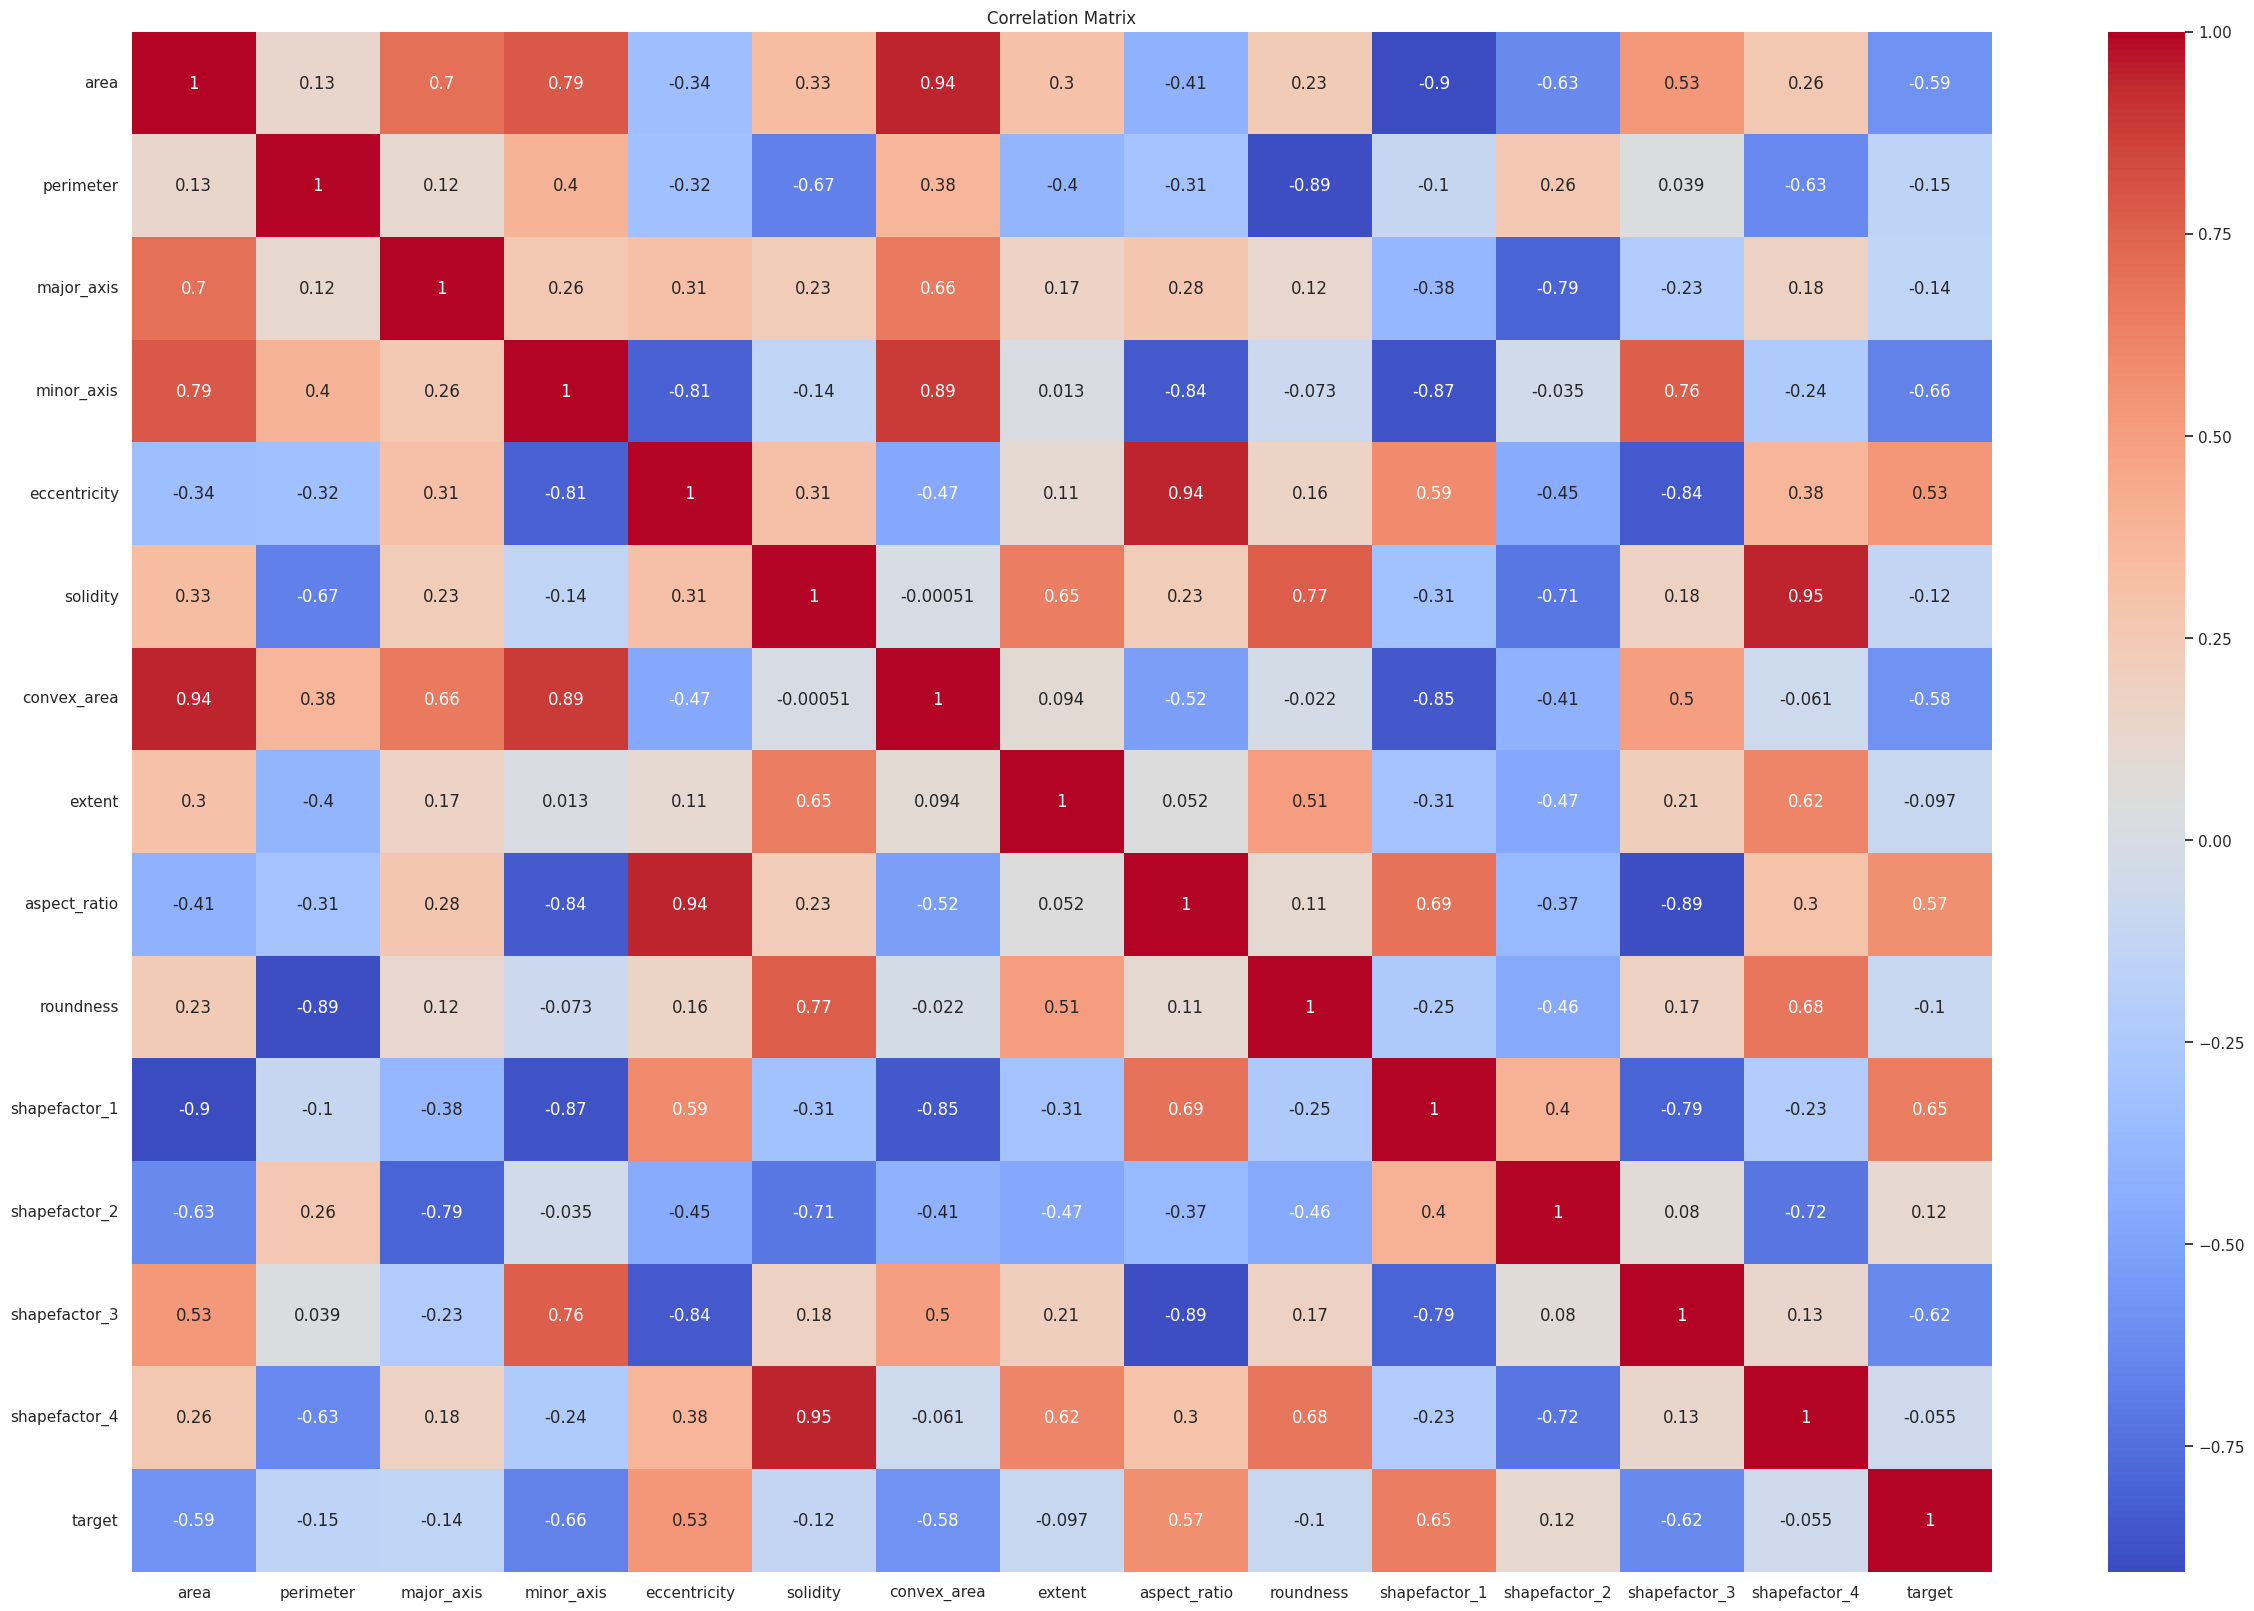

In [17]:
# Calculate the correlation matrix

corr_matrix =new_train_data.corr()
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

In [53]:
import pandas as pd
import numpy as np

def replace_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = df[column_name].median()
    
    df.loc[df[column_name] < lower_bound, column_name] = median_value
    df.loc[df[column_name] > upper_bound, column_name] = median_value
    
    return df

# Example usage
#df = pd.DataFrame({
#    'values': [1, 2, 3, 4, 5, 100, 6, 7, 8, 9]
#})

df = replace_outliers_iqr(new_train_data, 'area')
df = replace_outliers_iqr(new_train_data, 'perimeter')
df = replace_outliers_iqr(new_train_data, 'major_axis')
df = replace_outliers_iqr(new_train_data, 'minor_axis')
df = replace_outliers_iqr(new_train_data, 'eccentricity')
df = replace_outliers_iqr(new_train_data, 'solidity')
df = replace_outliers_iqr(new_train_data, 'convex_area')
df = replace_outliers_iqr(new_train_data, 'extent')
df = replace_outliers_iqr(new_train_data, 'aspect_ratio')
df = replace_outliers_iqr(new_train_data, 'shapefactor_1')
df = replace_outliers_iqr(new_train_data, 'shapefactor_2')
df = replace_outliers_iqr(new_train_data, 'shapefactor_3')
df = replace_outliers_iqr(new_train_data, 'shapefactor_4')

#print(df['area'].head(50))

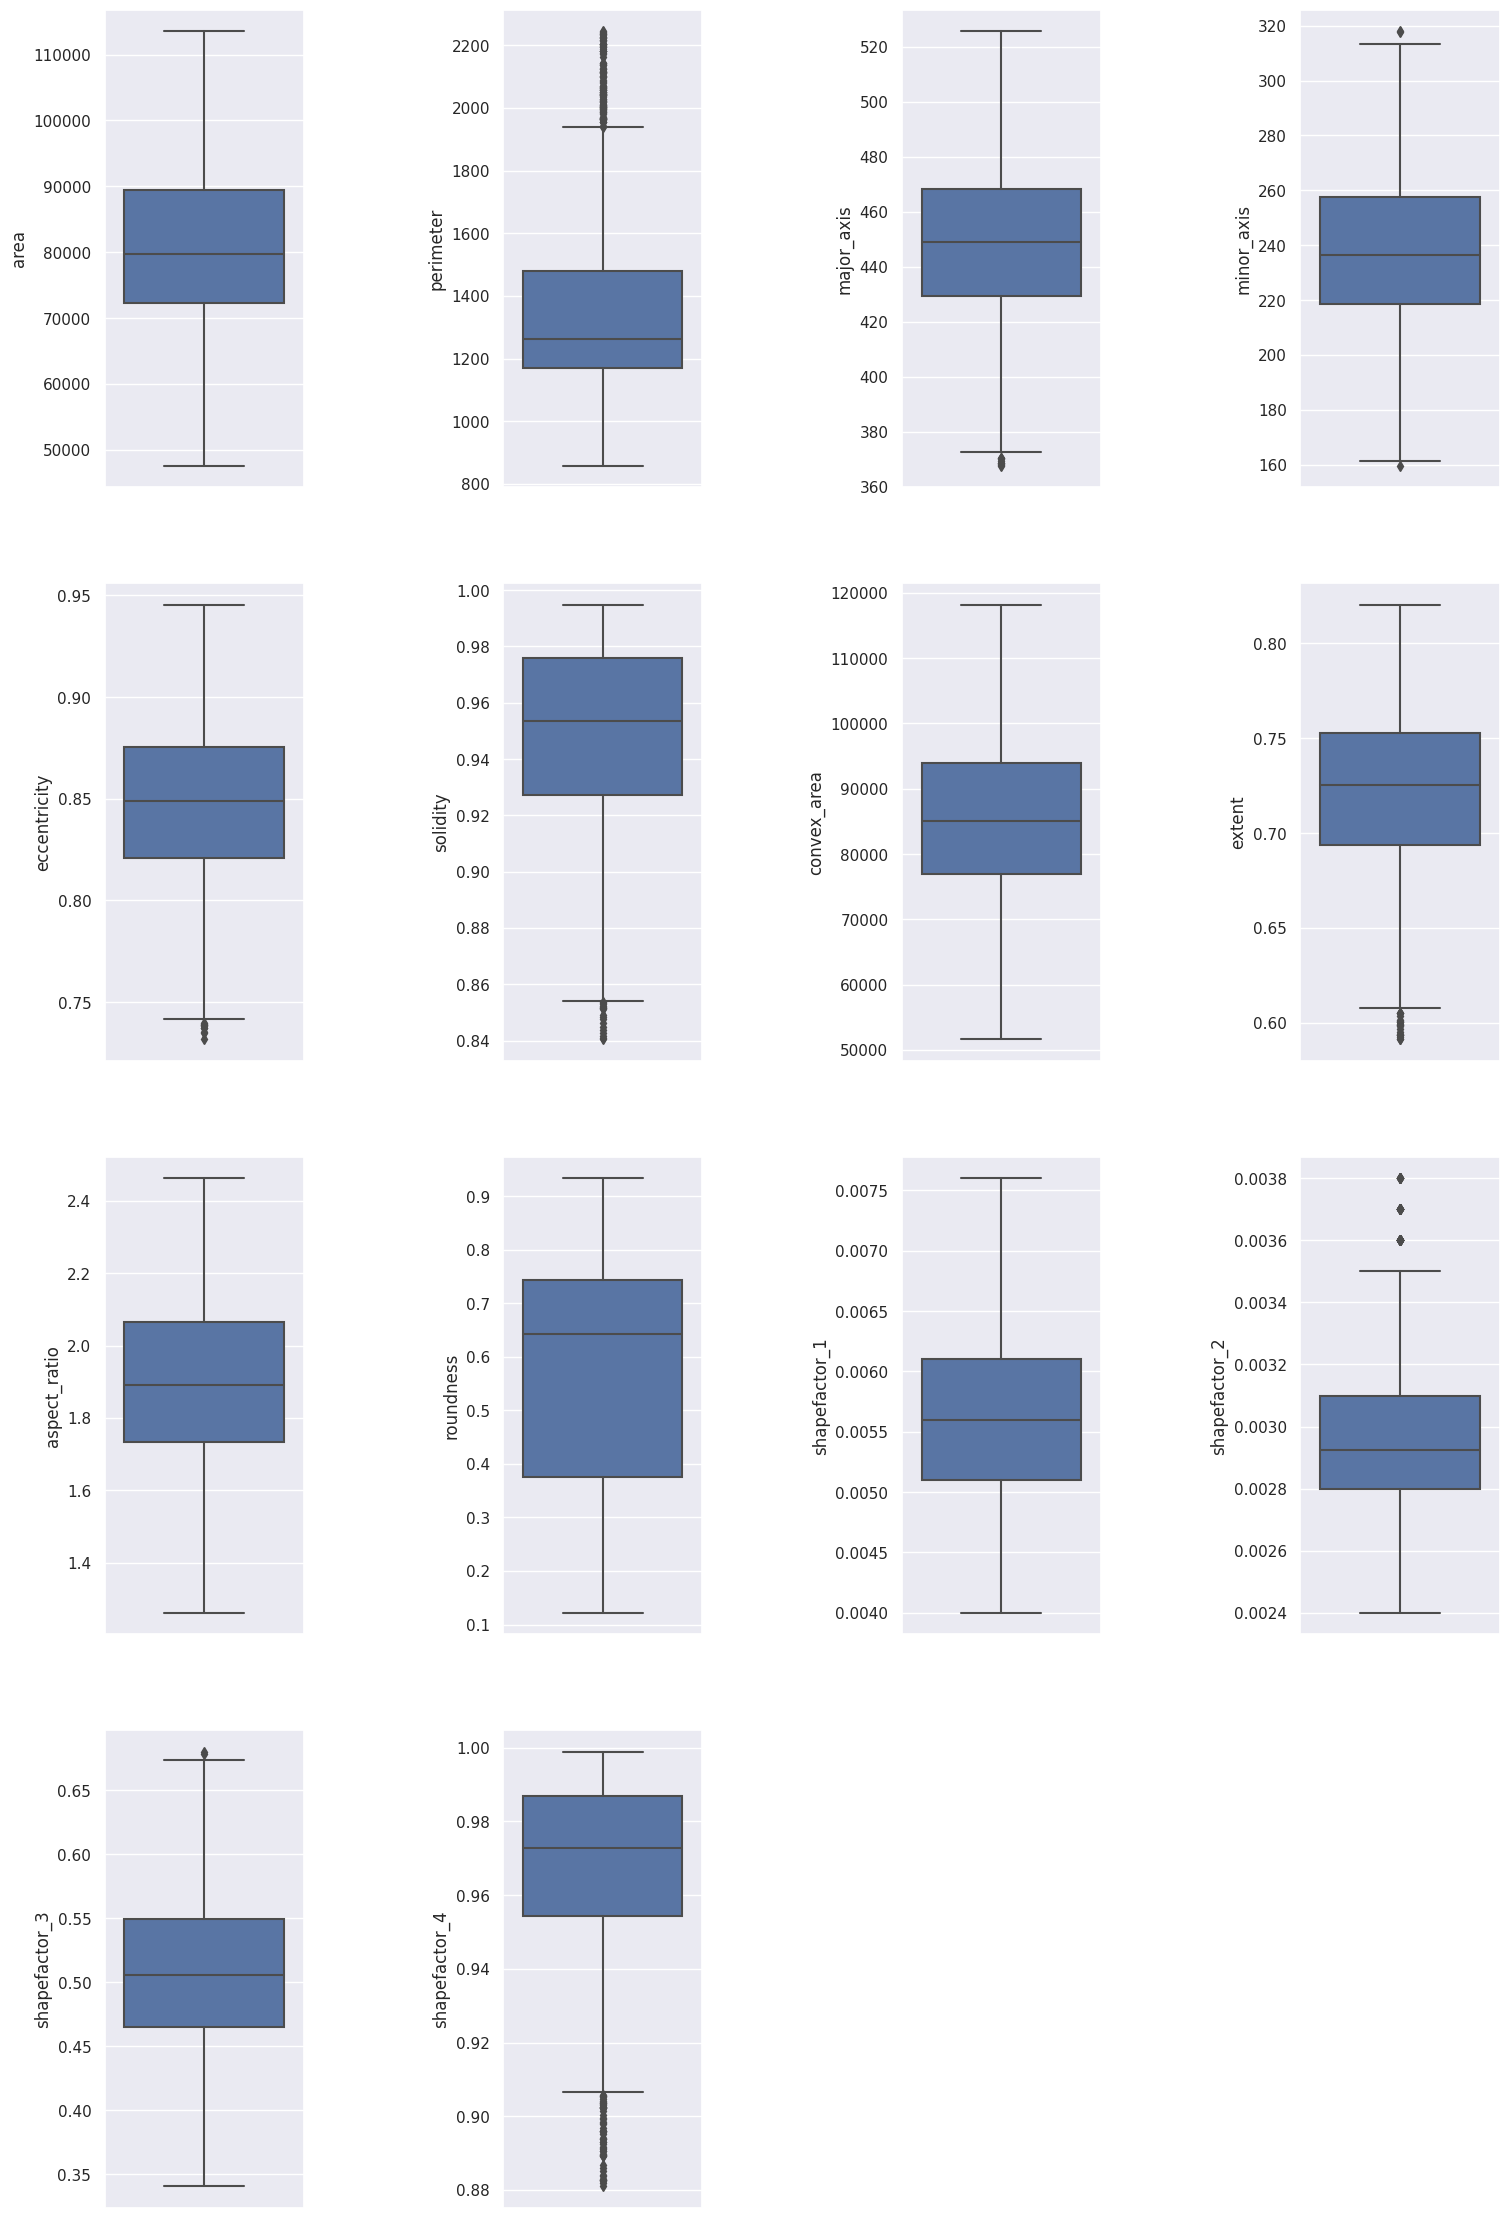

In [54]:
data_numeric = df.select_dtypes(include='number')
column_numeric = data_numeric.columns.drop('target')
# Box Plots
plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)


i = 1
for col_name in column_numeric:
    plt.subplot(5,4,i)
    sns.boxplot(data=df, y=col_name)
    i +=1

**Preprocessing And Feature Engineering**

In [18]:
# Split-out validation dataset
array = train_data.values
X = array[:,0:16].astype(float)
Y = array[:,16]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [19]:
X_train

array([[1.0329000e+05, 1.3679750e+03, 4.9153310e+02, ..., 2.6000000e-03,
        5.4430000e-01, 9.9450000e-01],
       [9.6001000e+04, 1.2096720e+03, 4.7399450e+02, ..., 2.7000000e-03,
        5.4410000e-01, 9.9420000e-01],
       [9.4564000e+04, 1.8330970e+03, 4.3075500e+02, ..., 3.1000000e-03,
        6.4890000e-01, 9.4510000e-01],
       ...,
       [8.7193000e+04, 1.1541680e+03, 4.3278120e+02, ..., 3.0000000e-03,
        5.9270000e-01, 9.9430000e-01],
       [8.4778000e+04, 2.3892419e+03, 4.5688280e+02, ..., 3.2000000e-03,
        5.1710000e-01, 8.7740000e-01],
       [8.7321000e+04, 1.1561840e+03, 4.6504530e+02, ..., 2.7000000e-03,
        5.1410000e-01, 9.9570000e-01]])

In [56]:
# NEW TRAIN DATA
array =df.values
new_X = array[:,0:14].astype(float)
new_Y = array[:,14]
validation_size = 0.20
seed = 7
new_X_train, new_X_validation, new_Y_train, new_Y_validation = train_test_split(new_X, new_Y, test_size=validation_size, random_state=seed)

In [57]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

In [72]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('XGB',  XGBClassifier()))
           

In [33]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.853398 (0.053079)
LDA: 0.861165 (0.036340)
KNN: 0.747573 (0.047958)
CART: 0.803883 (0.032142)
NB: 0.817476 (0.042718)
SVM: 0.783495 (0.038112)
RF: 0.868932 (0.036650)
AB: 0.851456 (0.031022)
ET: 0.863107 (0.034036)
XGB: 0.858252 (0.035593)


In [75]:
# NEW TRAIN DATA
new_results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, new_X_train, new_Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.857282 (0.054239)
LDA: 0.862136 (0.037300)
KNN: 0.747573 (0.047958)
CART: 0.800000 (0.034789)
NB: 0.816505 (0.045424)
SVM: 0.783495 (0.038112)
RF: 0.866019 (0.040684)
AB: 0.851456 (0.031022)
ET: 0.861165 (0.035019)
XGB: 0.857282 (0.035553)


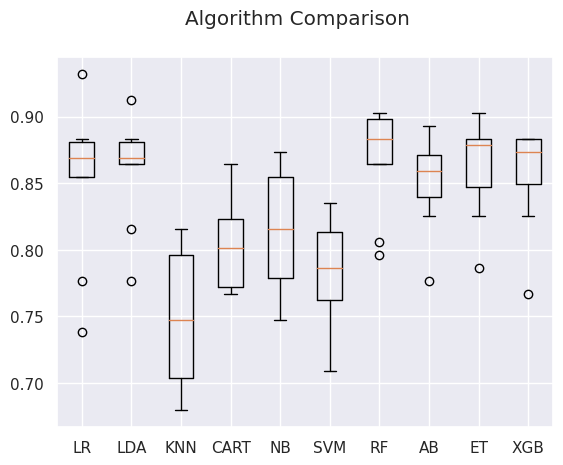

In [36]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [52]:
    # Standardize the dataset
pipelines = []
pipelines.append(('ScLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('ScET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
pipelines.append(('ScXGB', Pipeline([('Scaler', StandardScaler()),('XGB',  XGBClassifier())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed,  shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
    
    

ScLR: 0.869903 (0.044108)
ScLDA: 0.861165 (0.036340)
ScKNN: 0.866019 (0.034681)
ScCART: 0.804854 (0.034857)
ScNB: 0.856311 (0.051520)
ScSVM: 0.868932 (0.032852)
ScRF: 0.866990 (0.044289)
ScAB: 0.851456 (0.031022)
ScET: 0.859223 (0.048592)
ScXGB: 0.858252 (0.035593)


In [76]:
# NEW TRAIN DATA
    # Standardize the dataset
pipelines = []
pipelines.append(('ScLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
pipelines.append(('ScRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
pipelines.append(('ScAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
pipelines.append(('ScET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
pipelines.append(('ScXGB', Pipeline([('Scaler', StandardScaler()),('XGB',  XGBClassifier())])))
new_results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed,  shuffle=True)
  cv_results = cross_val_score(model, new_X_train, new_Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScLR: 0.869903 (0.044108)
ScLDA: 0.862136 (0.037300)
ScKNN: 0.864078 (0.036585)
ScCART: 0.803883 (0.041601)
ScNB: 0.857282 (0.050830)
ScSVM: 0.870874 (0.031325)
ScRF: 0.867961 (0.047205)
ScAB: 0.851456 (0.031022)
ScET: 0.866019 (0.041145)
ScXGB: 0.857282 (0.035553)


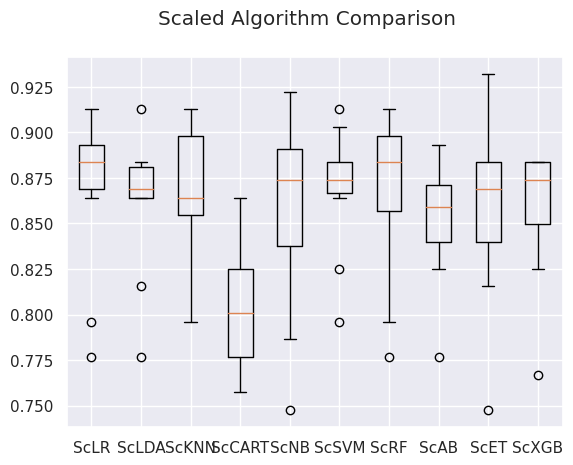

In [53]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [56]:
# Tuning LogisticRegression
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 1.0, 10.0]
penalty_values = ['l1', 'l2']
solver_values = ['liblinear', 'saga']
param_grid = dict(C=c_values, penalty=penalty_values, solver=solver_values)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.870874 using {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.855340 (0.048824) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
0.855340 (0.049591) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.863107 (0.050904) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.864078 (0.048737) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.867961 (0.046399) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.869903 (0.044321) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868932 (0.043905) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.869903 (0.044108) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.870874 (0.041657) with: {'C': 10.0, 'penalty': 'l1', 'solver': 'liblinear'}
0.868932 (0.041476) with: {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}
0.869903 (0.043679) with: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.868932 (0.041476) with: {'C': 10.0, 'penalty': 'l2', 'solver': 'saga'}


**Using GridSearch to find optimal hyperparameters**

In [ ]:
# Define hyperparameter grids
DecisionTree_hyperparameters = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy']
}

RandomForest_hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

XGBoost_hyperparameters = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

SVM_hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

KNN_hyperparameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

LogisticRegression_hyperparameters = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform grid search for each model
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression()
}

for model_name, model in models.items():
    hyperparameters = eval(model_name + '_hyperparameters')
    grid_search = GridSearchCV(model, hyperparameters, cv=10)
    grid_search.fit(scaled_x_train, y_train)
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"{model_name} Best Parameters: {best_params}")
    print(f"{model_name} Best Score: {best_score}")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++")

DecisionTree Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTree Best Score: 0.8466019417475728
++++++++++++++++++++++++++++++++++++++++++++++++++++


**Train and Evaluate Models**

In [58]:
!pip install openpyxl

In [59]:
!pip install flaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.2/314.2 kB 6.8 MB/s eta 0:00:00:00:01


In [60]:
from flaml import AutoML
automl = AutoML()

In [61]:
settings = {
    "time_budget": 600,  # total running time in seconds
    "metric": 'accuracy',  # can be: 'r2', 'rmse', 'mae', 'mse', 'accuracy', 'roc_auc', 'roc_auc_ovr',
                           # 'roc_auc_ovo', 'log_loss', 'mape', 'f1', 'ap', 'ndcg', 'micro_f1', 'macro_f1'
    "task": 'classification',  # task type
    "seed": 7,    # random seed
}

In [ ]:
automl.fit(new_X_train, new_Y_train, **settings)

[flaml.automl.logger: 04-27 08:10:56] {1728} INFO - task = classification
[flaml.automl.logger: 04-27 08:10:56] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 04-27 08:10:56] {1838} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 04-27 08:10:56] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 04-27 08:10:56] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 04-27 08:10:56] {2393} INFO - Estimated sufficient time budget=649s. Estimated necessary time budget=16s.
[flaml.automl.logger: 04-27 08:10:56] {2442} INFO -  at 0.3s,	estimator lgbm's best error=0.1641,	best estimator lgbm's best error=0.1641
[flaml.automl.logger: 04-27 08:10:56] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 04-27 08:10:56] {2442} INFO -  at 0.3s,	estimator lgbm's best error=0.1641,	best estimator lgbm's best error=0.1641
[flaml.automl.lo

In [63]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 33, 'num_leaves': 7, 'min_child_samples': 14, 'learning_rate': 0.20655038192706093, 'log_max_bin': 10, 'colsample_bytree': 0.7389888219446036, 'reg_alpha': 0.0012945713718853676, 'reg_lambda': 0.22545943106173177}
Best accuracy on validation data: 0.8883
Training duration of best run: 0.01803 s


In [64]:
automl.model.estimator

LGBMClassifier(colsample_bytree=0.7389888219446036,
               learning_rate=0.20655038192706093, max_bin=1023,
               min_child_samples=14, n_estimators=33, n_jobs=-1, num_leaves=7,
               reg_alpha=0.0012945713718853676, reg_lambda=0.22545943106173177,
               verbose=-1)

In [80]:
# Split-out validation dataset

new_test_data = pd.read_csv("/kaggle/input/dataset/test.csv")

new_test_data=new_test_data.drop(['eqdiasq','compactness'], axis=1)
new_test_data.head()



,area,perimeter,major_axis,minor_axis,eccentricity,solidity,convex_area,extent,aspect_ratio,roundness,shapefactor_1,shapefactor_2,shapefactor_3,shapefactor_4
0,93313,1862.7260,447.1666,278.4893,0.7824,0.9361,99678,0.7607,1.6057,0.3380,0.0048,0.0030,0.5942,0.9541
1,78778,2159.5969,439.1004,240.0113,0.8374,0.9340,84345,0.7265,1.8295,0.2123,0.0056,0.0030,0.5202,0.9517
2,74757,1661.6720,441.6910,225.3914,0.8600,0.9359,79873,0.7255,1.9597,0.3402,0.0059,0.0030,0.4879,0.9561
3,88074,2199.8889,460.8836,283.3717,0.7886,0.8709,101133,0.6922,1.6264,0.2287,0.0052,0.0032,0.5279,0.8586
4,79318,2589.4900,429.3032,279.5817,0.7589,0.8666,91528,0.6634,1.5355,0.1486,0.0054,0.0035,0.5480,0.8414


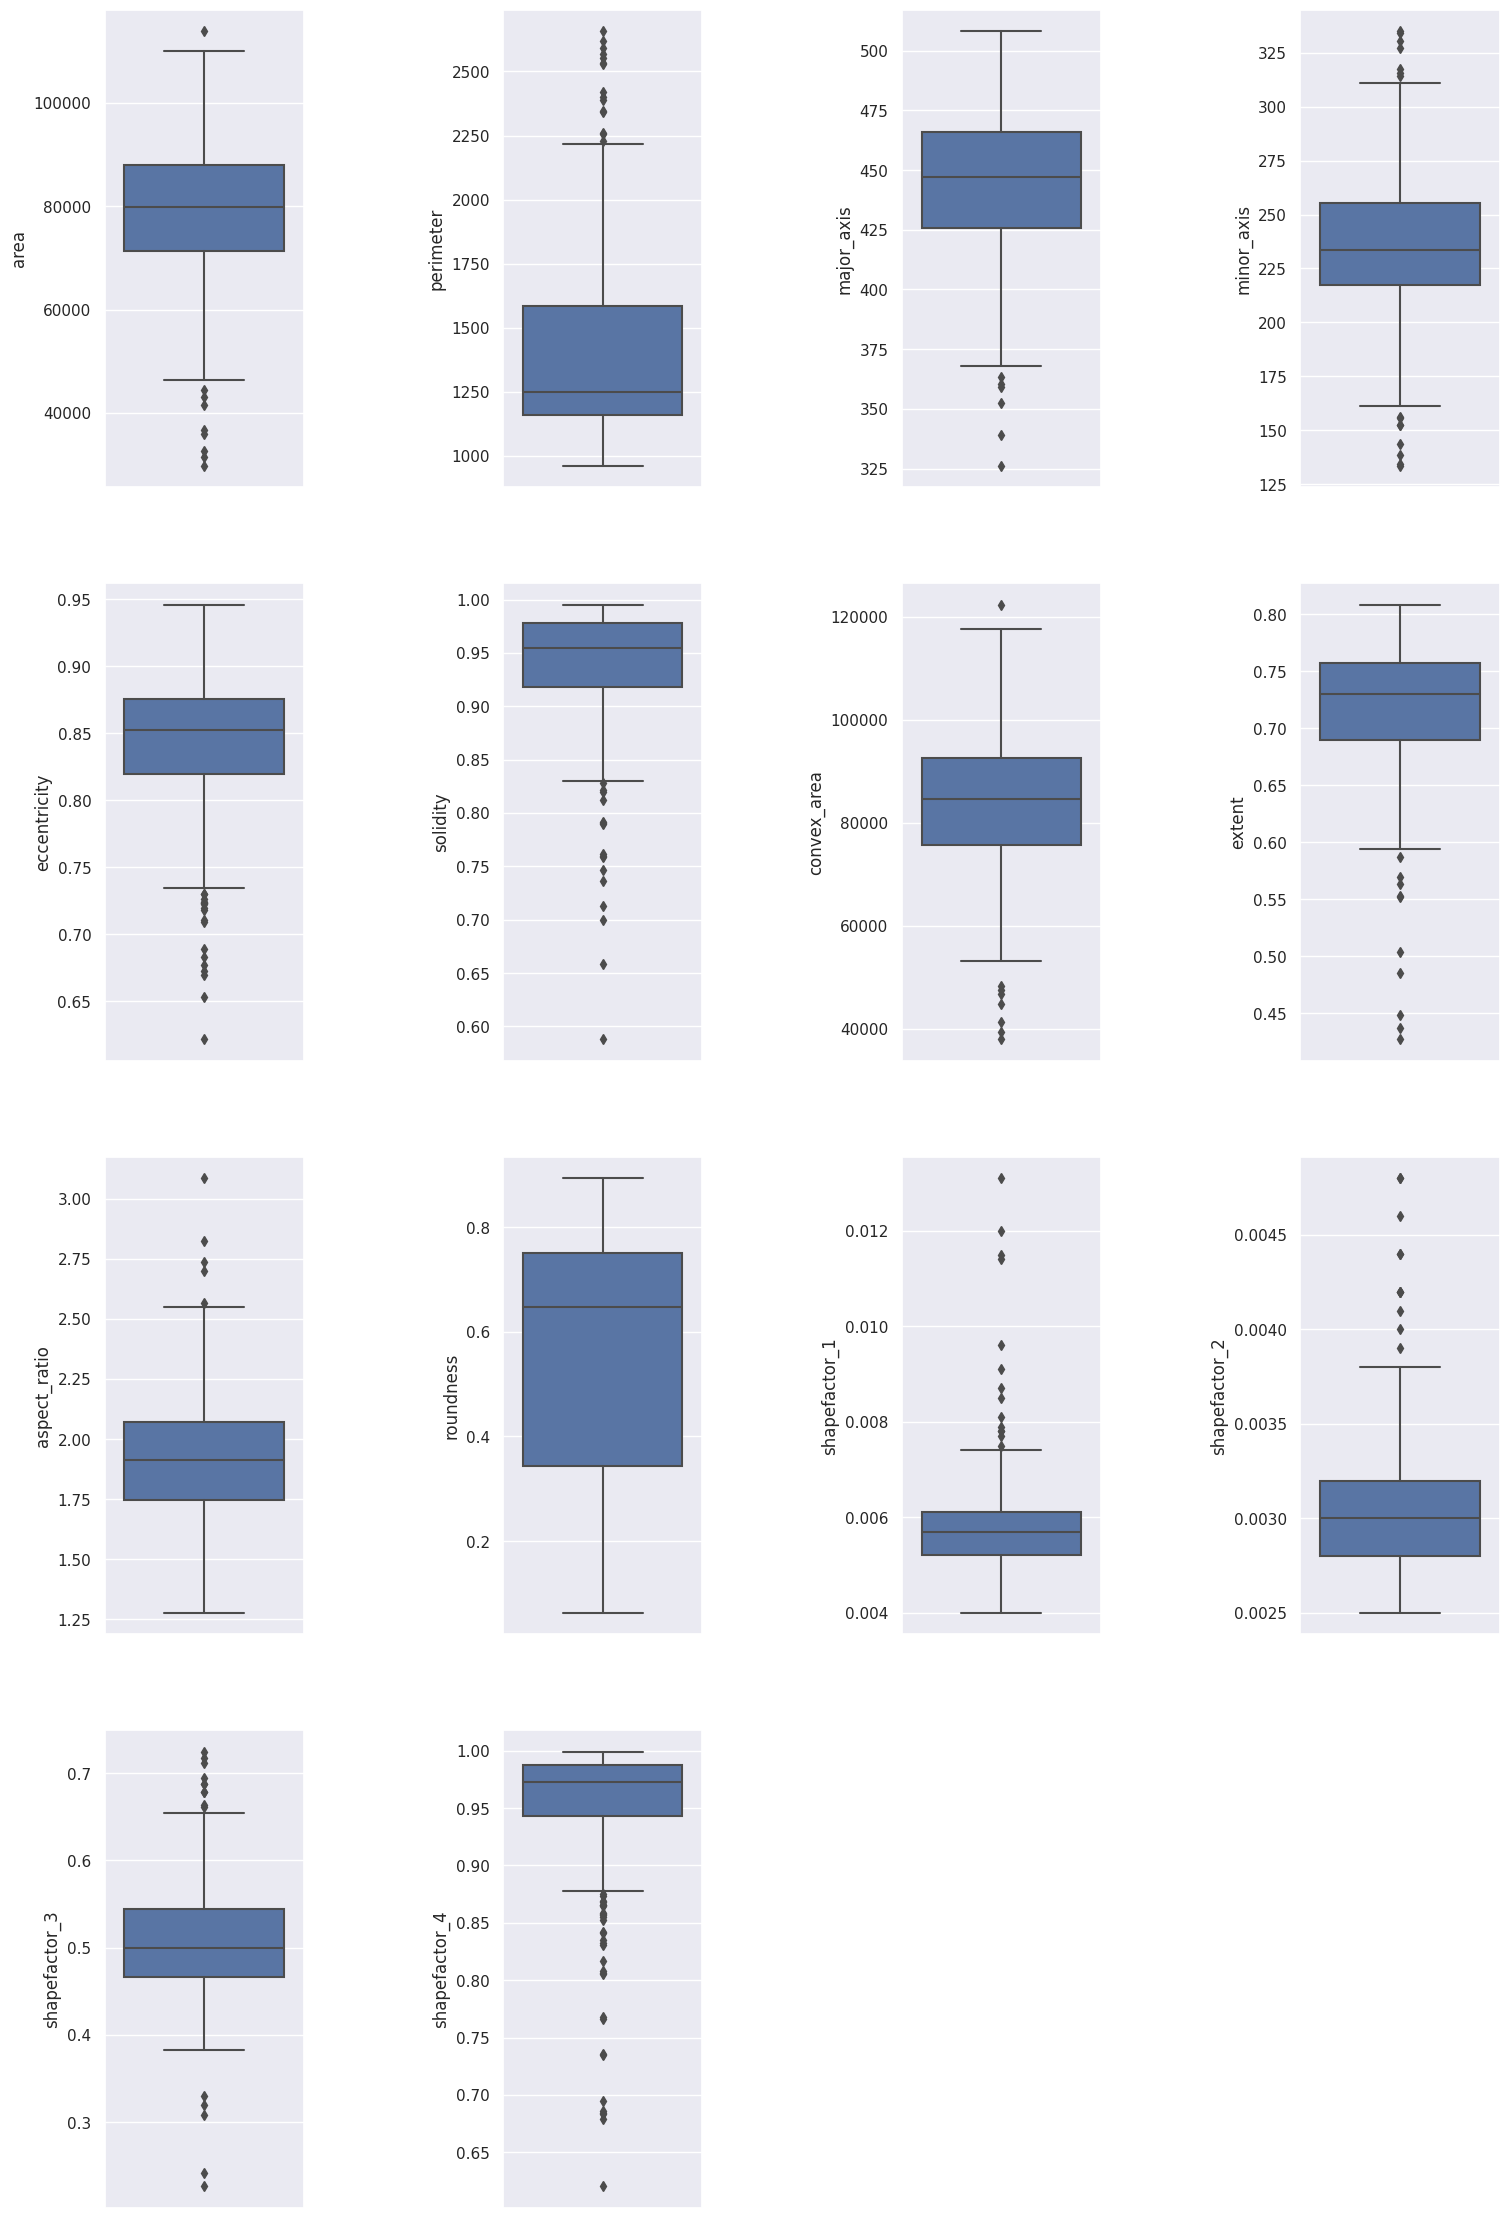

In [82]:
data_numeric = new_test_data.select_dtypes(include='number')
column_numeric = data_numeric.columns
# Box Plots
plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)


i = 1
for col_name in column_numeric:
    plt.subplot(5,4,i)
    sns.boxplot(data=new_test_data, y=col_name)
    i +=1

In [84]:
import pandas as pd
import numpy as np

def replace_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    median_value = df[column_name].median()
    
    df.loc[df[column_name] < lower_bound, column_name] = median_value
    df.loc[df[column_name] > upper_bound, column_name] = median_value
    
    return df

# Example usage
#df = pd.DataFrame({
#    'values': [1, 2, 3, 4, 5, 100, 6, 7, 8, 9]
#})

df_test = replace_outliers_iqr(new_test_data, 'area')
df_test = replace_outliers_iqr(new_test_data, 'perimeter')
df_test = replace_outliers_iqr(new_test_data, 'major_axis')
df_test = replace_outliers_iqr(new_test_data, 'minor_axis')
df_test = replace_outliers_iqr(new_test_data, 'eccentricity')
df_test = replace_outliers_iqr(new_test_data, 'solidity')
df_test = replace_outliers_iqr(new_test_data, 'convex_area')
df_test = replace_outliers_iqr(new_test_data, 'extent')
df_test = replace_outliers_iqr(new_test_data, 'aspect_ratio')
df_test = replace_outliers_iqr(new_test_data, 'shapefactor_1')
df_test = replace_outliers_iqr(new_test_data, 'shapefactor_2')
df_test = replace_outliers_iqr(new_test_data, 'shapefactor_3')
df_test = replace_outliers_iqr(new_test_data, 'shapefactor_4')

#print(df['area'].head(50))

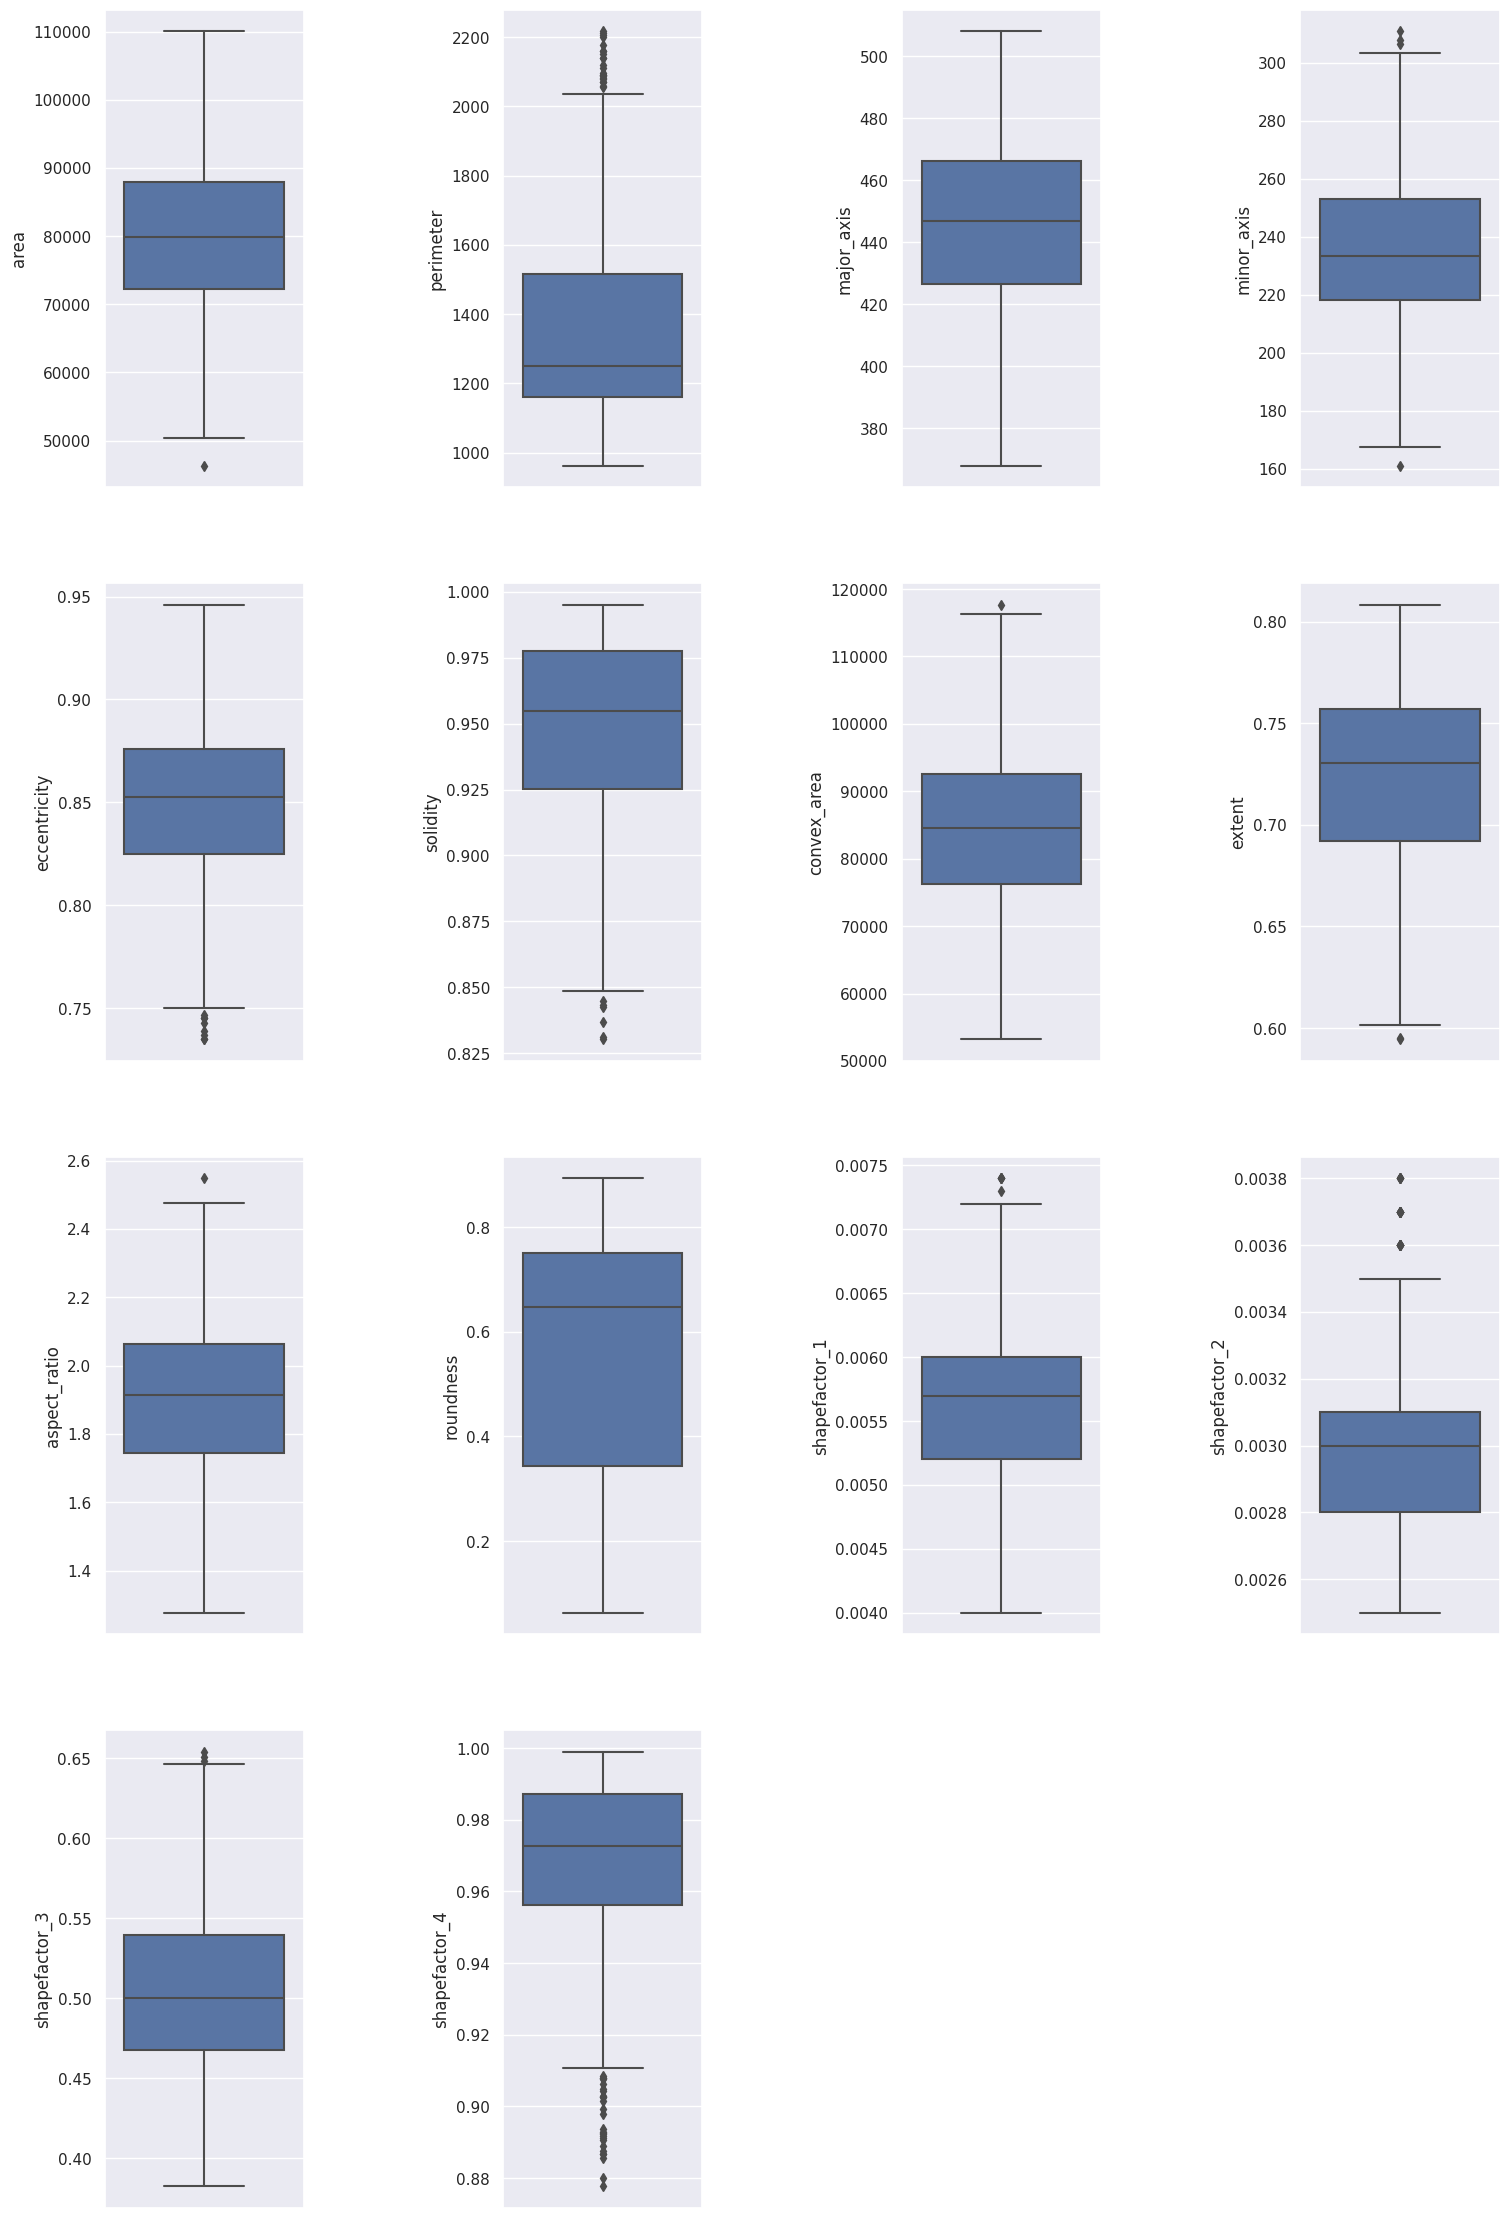

In [85]:
data_numeric = df_test.select_dtypes(include='number')
column_numeric = data_numeric.columns
# Box Plots
plt.figure(figsize=(18,36))
plt.subplots_adjust(wspace=1, hspace=None)


i = 1
for col_name in column_numeric:
    plt.subplot(5,4,i)
    sns.boxplot(data=df_test, y=col_name)
    i +=1

In [86]:
array = df_test.values
new_X = array[:,0:14].astype(float)

In [87]:
print(new_X)

[[9.3313000e+04 1.8627260e+03 4.4716660e+02 ... 3.0000000e-03
  5.9420000e-01 9.5410000e-01]
 [7.8778000e+04 2.1595969e+03 4.3910040e+02 ... 3.0000000e-03
  5.2020000e-01 9.5170000e-01]
 [7.4757000e+04 1.6616720e+03 4.4169100e+02 ... 3.0000000e-03
  4.8790000e-01 9.5610000e-01]
 ...
 [8.5519000e+04 1.2008210e+03 4.8068190e+02 ... 2.8000000e-03
  4.7130000e-01 9.4200000e-01]
 [8.6261000e+04 1.1568521e+03 4.5653740e+02 ... 2.8000000e-03
  5.2700000e-01 9.9680000e-01]
 [5.1626000e+04 1.0305439e+03 3.8183360e+02 ... 3.4000000e-03
  4.5080000e-01 9.6700000e-01]]


In [71]:
from sklearn.metrics import classification_report
print(classification_report(new_Y_train, automl.predict(new_X_train)))


              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       432
         1.0       0.94      0.94      0.94       598

    accuracy                           0.93      1030
   macro avg       0.93      0.93      0.93      1030
weighted avg       0.93      0.93      0.93      1030



In [72]:
print(classification_report(new_Y_validation, automl.predict(new_X_validation)))



              precision    recall  f1-score   support

         0.0       0.89      0.75      0.81       119
         1.0       0.81      0.92      0.86       139

    accuracy                           0.84       258
   macro avg       0.85      0.83      0.84       258
weighted avg       0.85      0.84      0.84       258



In [ ]:
# Split-out validation dataset
array = test_data.values
X = array[:,0:16].astype(float)


In [28]:
X

array([[9.3313000e+04, 1.8627260e+03, 4.4716660e+02, ..., 3.0000000e-03,
        5.9420000e-01, 9.5410000e-01],
       [7.8778000e+04, 2.1595969e+03, 4.3910040e+02, ..., 3.0000000e-03,
        5.2020000e-01, 9.5170000e-01],
       [7.4757000e+04, 1.6616720e+03, 4.4169100e+02, ..., 3.0000000e-03,
        4.8790000e-01, 9.5610000e-01],
       ...,
       [8.5519000e+04, 1.2008210e+03, 4.8068190e+02, ..., 2.8000000e-03,
        4.7130000e-01, 9.4200000e-01],
       [8.6261000e+04, 1.1568521e+03, 4.5653740e+02, ..., 2.8000000e-03,
        5.2700000e-01, 9.9680000e-01],
       [5.1626000e+04, 1.0305439e+03, 3.8183360e+02, ..., 3.4000000e-03,
        4.5080000e-01, 9.6700000e-01]])

In [88]:
new_result=automl.predict(new_X)

In [89]:
new_result

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0.

In [90]:
open('answer_4.csv','w').write("\n".join([str(int(i)) for i in new_result]))

859

In [29]:
result=automl.predict(X)

In [33]:
result


array([0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 1., 0.

In [32]:
open('answer.csv','w').write("\n".join([str(int(i)) for i in result]))

859